# Generate Background Images for `ev3devsim` Robot Simulator

Simple routes for generating png files for use in `ev3devsim` robot simulator.

Image size: width 2362px, height 1143px.

*Could be useful to support interactive canvas drawing of backgrounds too?*

In the Docker container, background originals are in `/srv/conda/envs/notebook/lib/python3.7/site-packages/nbev3devsim/backgrounds/`. Find paths via: `python -m site`

In [2]:
from IPython.display import Image as I
from PIL import Image, ImageDraw


mode = 'RGB'
size = (2362, 1143)
color = 'white'

It is possible to add metadata text to PNG images ([docs](https://dev.exiv2.org/projects/exiv2/wiki/The_Metadata_in_PNG_files); [example](https://stackoverflow.com/a/58399815/454773)), which could provide a way of getting config information into the simulator setup. As well as writing metadata into the image, we also need to extract it (using something like [this](https://github.com/hometlt/png-metadata) maybe?).

## Blank Image

In [2]:
filename = '_backgrounds/_blank.png'

img = Image.new(mode, size, color)
img.save(filename)

## Greys

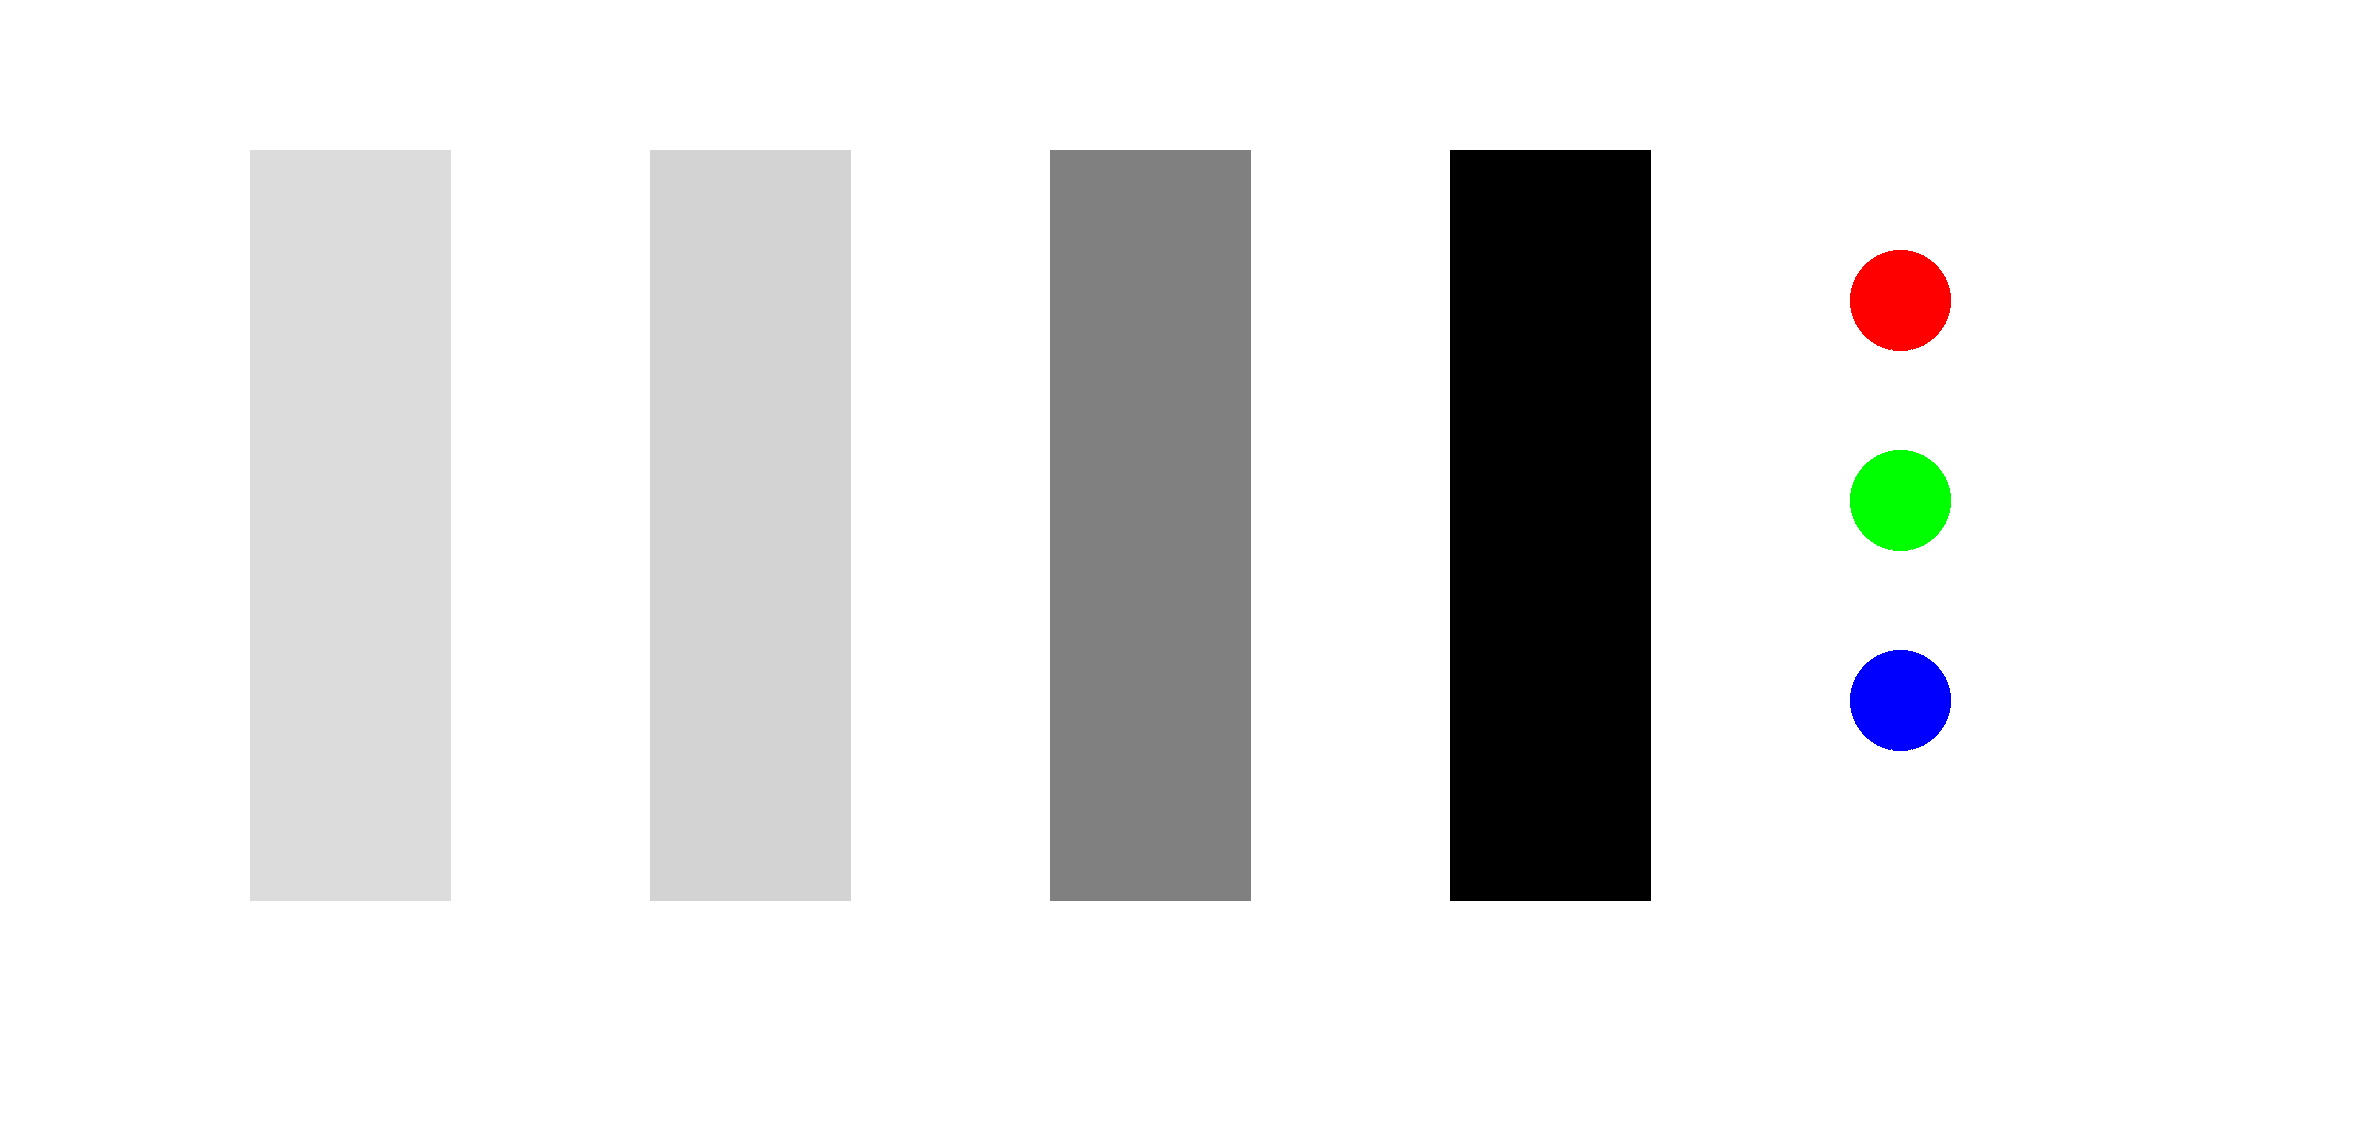

In [29]:
filename = '_backgrounds/_greys.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

x_init = 250
x_width = 200
x_gap = x_width
y_init = 150
y_height = 750
diam = 100

for fill in ['gainsboro', 'lightgrey', 'grey', 'black']:
    draw.rectangle([(x_init, y_init), (x_init+x_width, y_init+y_height)], fill=fill)
    x_init = x_init + x_width + x_gap
#draw.rectangle([(800, 300), (1000, 900)], fill='gainsboro')
#draw.rectangle([(1200, 300), (1400, 900)], fill='lightgrey')
#draw.rectangle([(1600, 300), (1800, 900)], fill='grey')
#draw.rectangle([(2000, 300), (2200, 900)], fill='black')


y_h = y_init + diam
for fill in ['#FF0000', '#00FF00', '#0000FF']:
    draw.ellipse((x_init, y_h, x_init + diam, y_h + diam), fill = fill)
    y_h += 2 * diam

img.save(filename)
I(filename)

## Coloured Bands

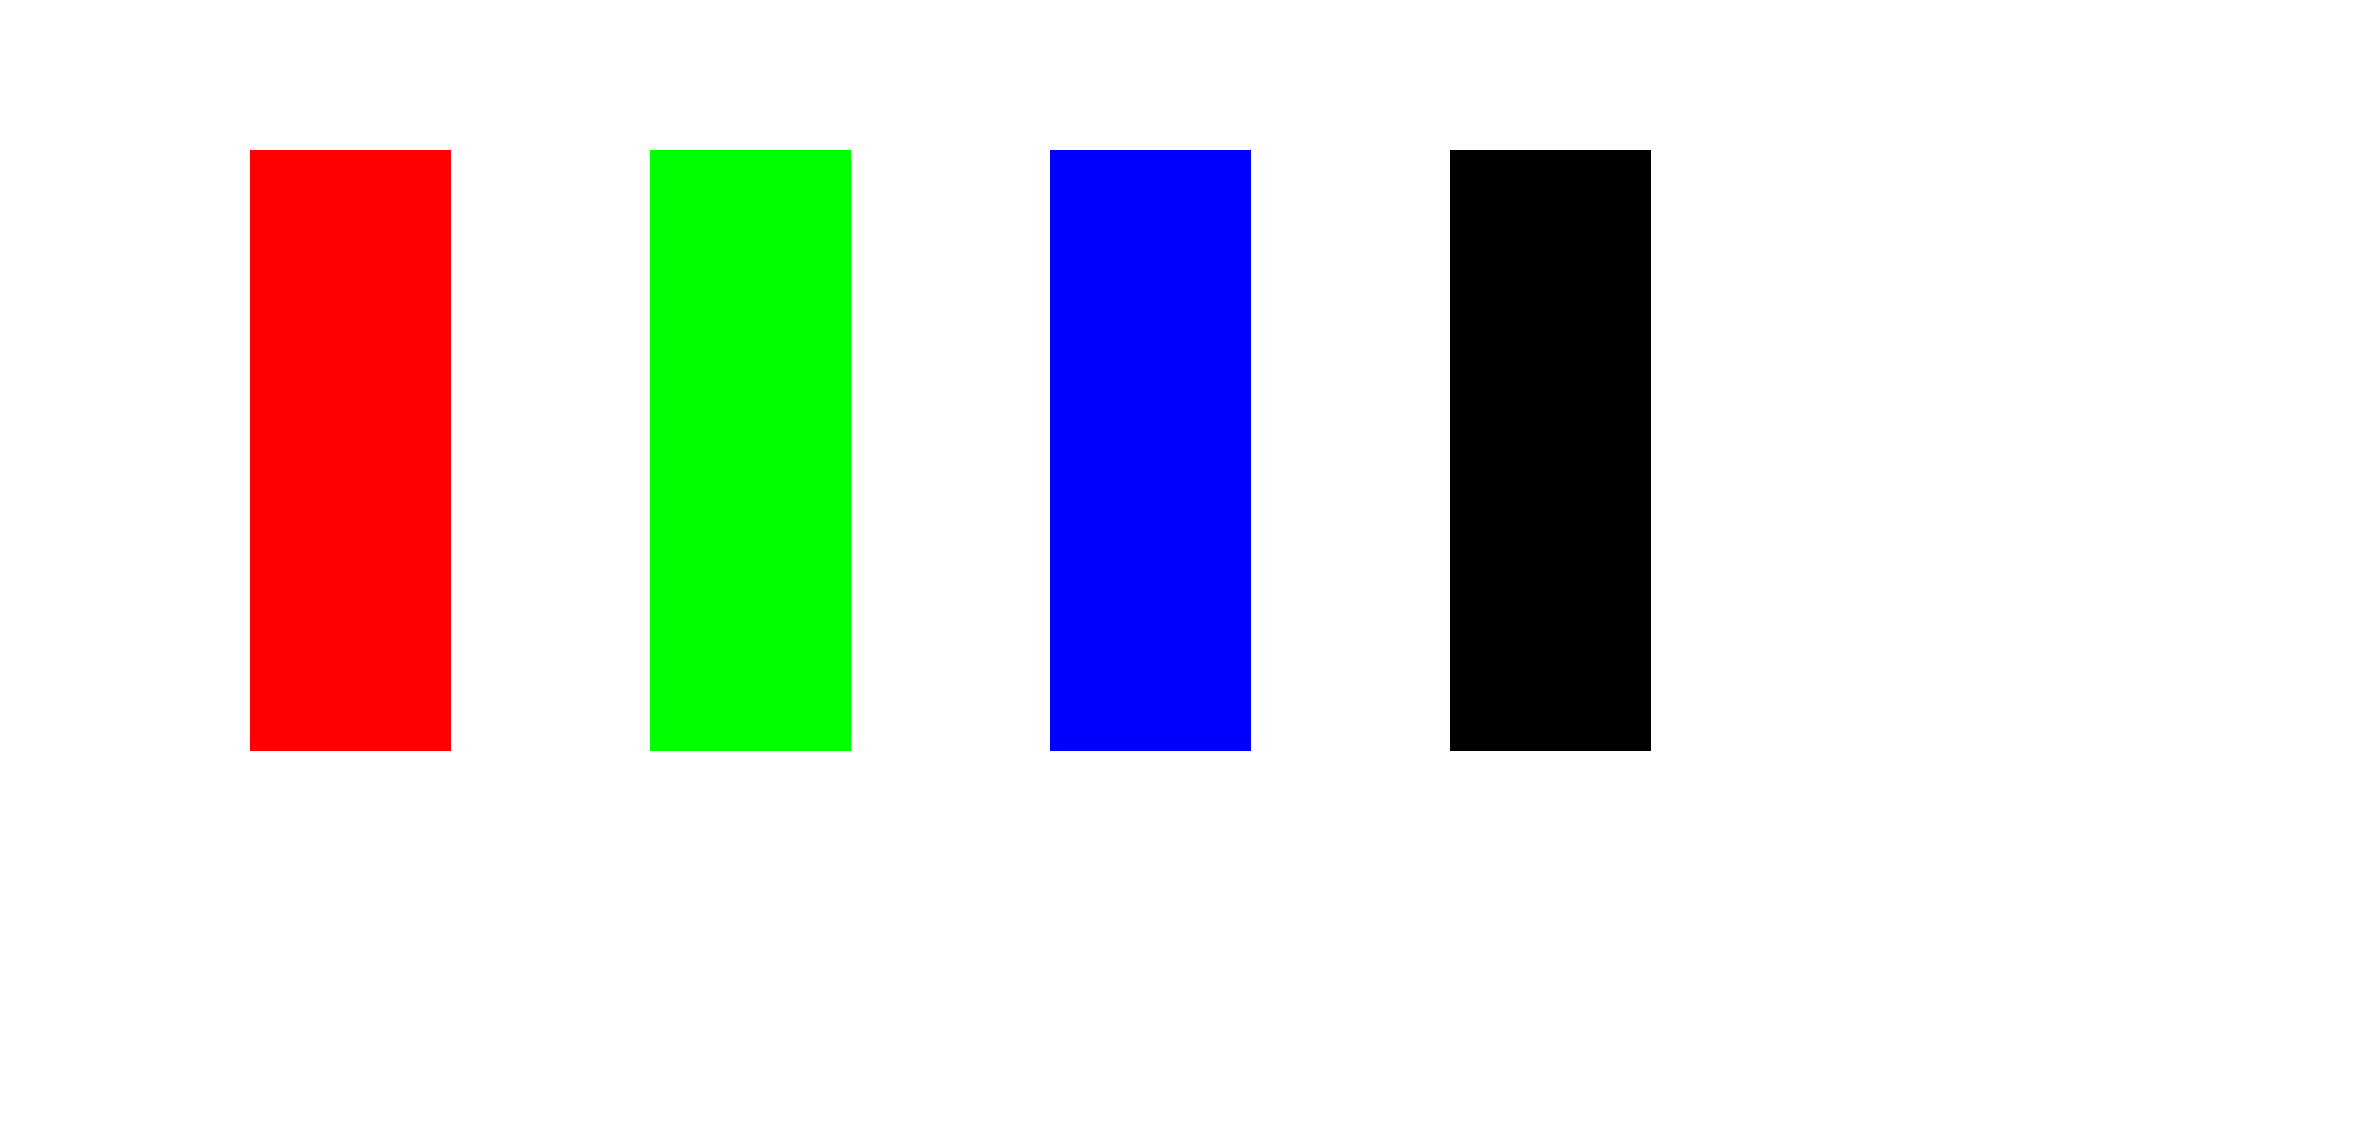

In [30]:
filename = '_backgrounds/_coloured_bands.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

x_init = 250
x_width = 200
x_gap = x_width
y_init = 150
y_height = 600

for fill in ['#FF0000', '#00FF00', '#0000FF', '#000000']:
    draw.rectangle([(x_init, y_init), (x_init+x_width, y_init+y_height)], fill=fill)
    x_init = x_init + x_width + x_gap
    
#draw.rectangle([(800, 300), (1000, 900)], fill='#FF0000')
#draw.rectangle([(1200, 300), (1400, 900)], fill='#00FF00')
#draw.rectangle([(1600, 300), (1800, 900)], fill='#0000FF')
#draw.rectangle([(2000, 300), (2200, 900)], fill='#000000')
img.save(filename)
I(filename)

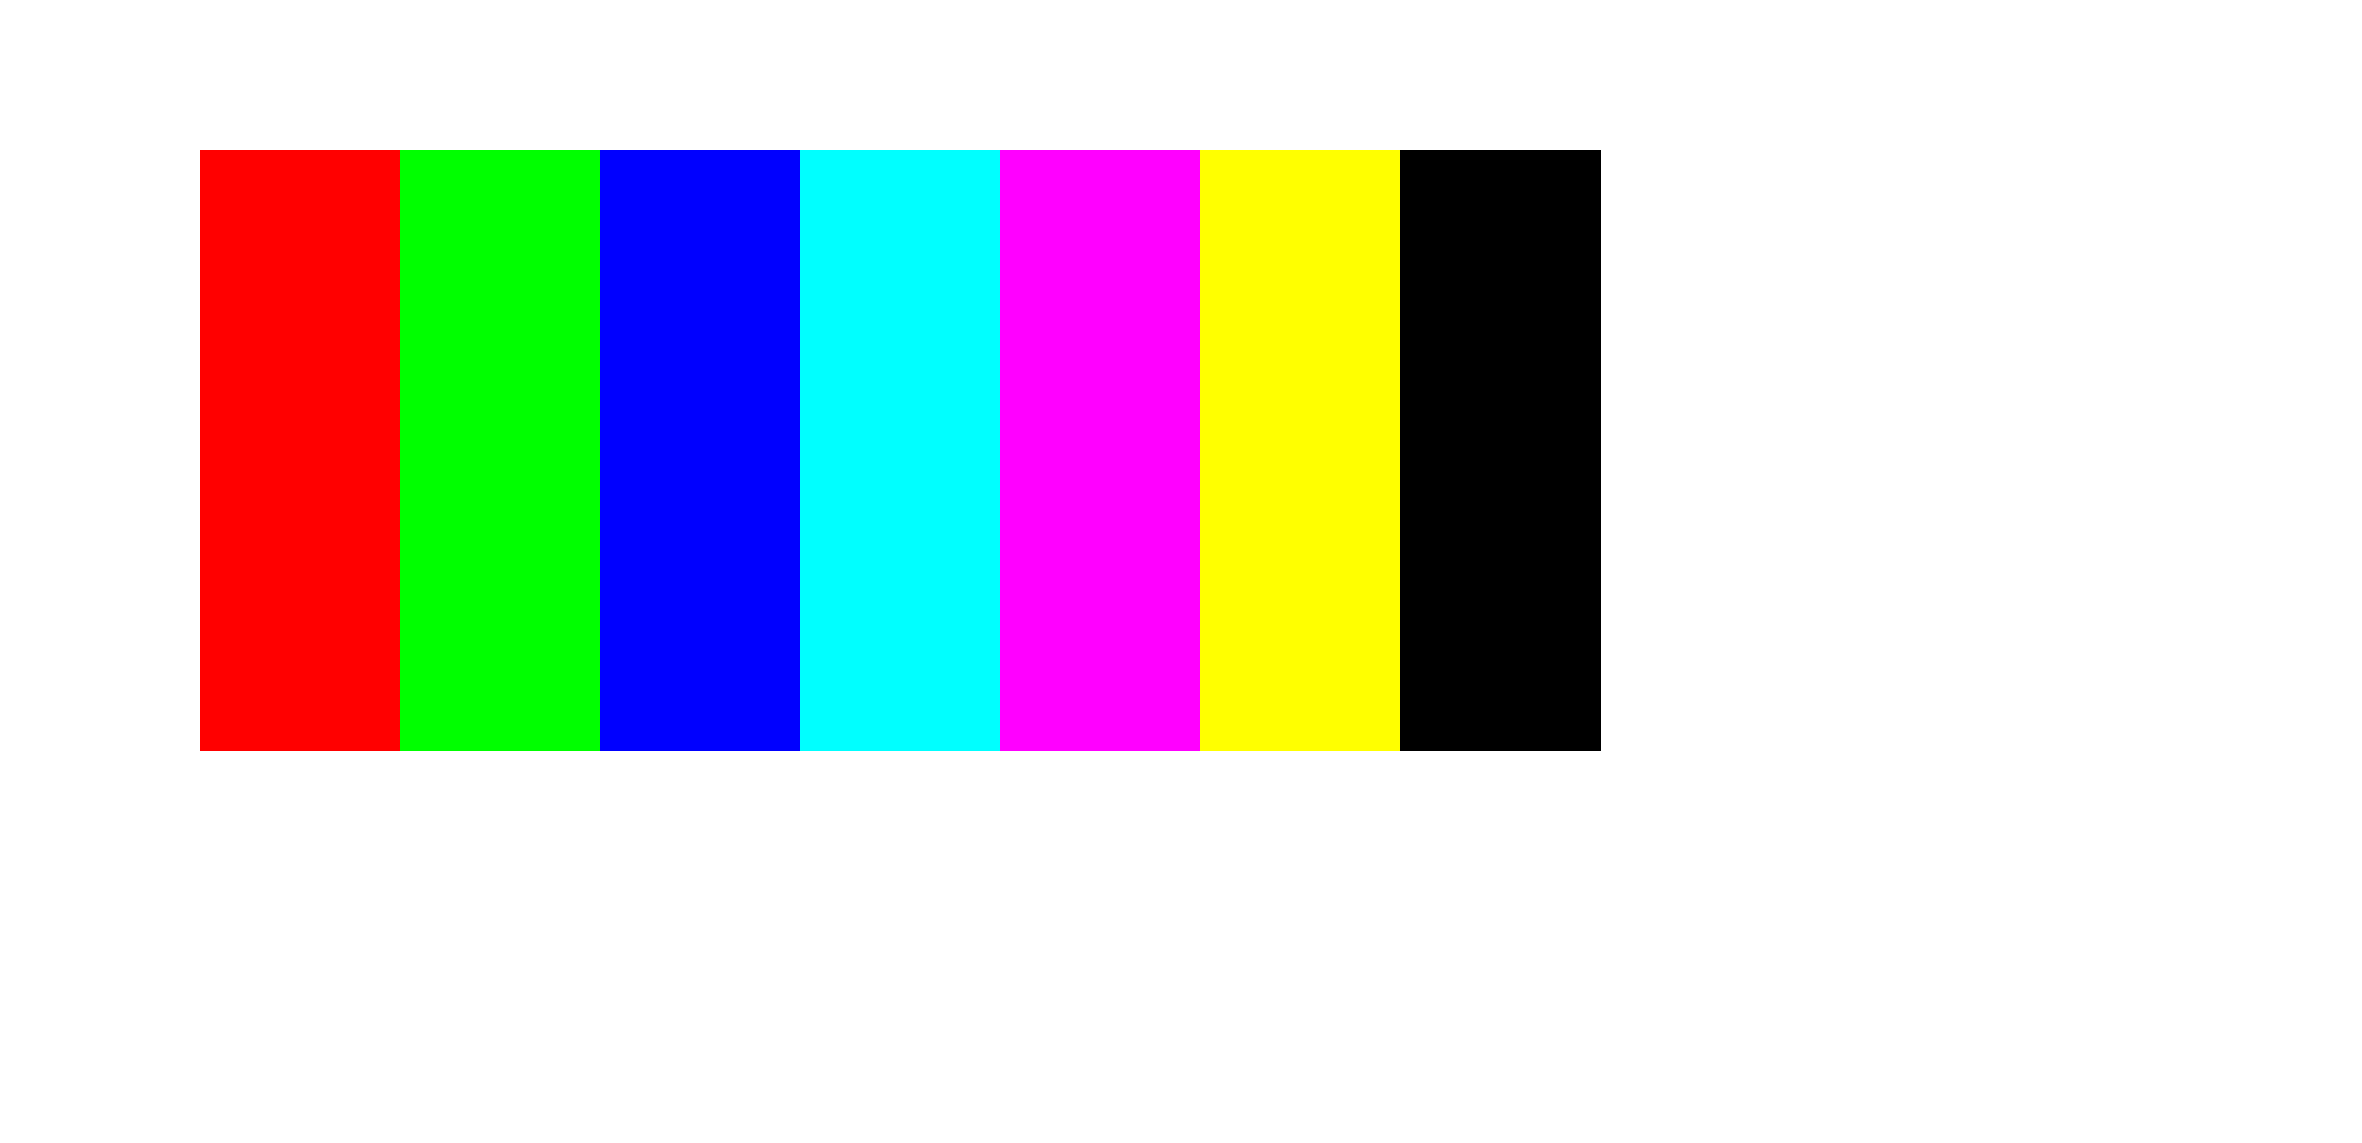

In [31]:
filename = '_backgrounds/_rainbow_bands.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

_delta_w = 200
_w = 200

y_init = 150
y_height = 600

for c in ['#FF0000', '#00FF00', '#0000FF', '#00FFFF', '#FF00FF', '#FFFF00', '#000000']:
    draw.rectangle([(_w, y_init), (_w+_delta_w, y_init+y_height)], fill=c)
    _w += _delta_w
img.save(filename)
I(filename)

## Grey and Black

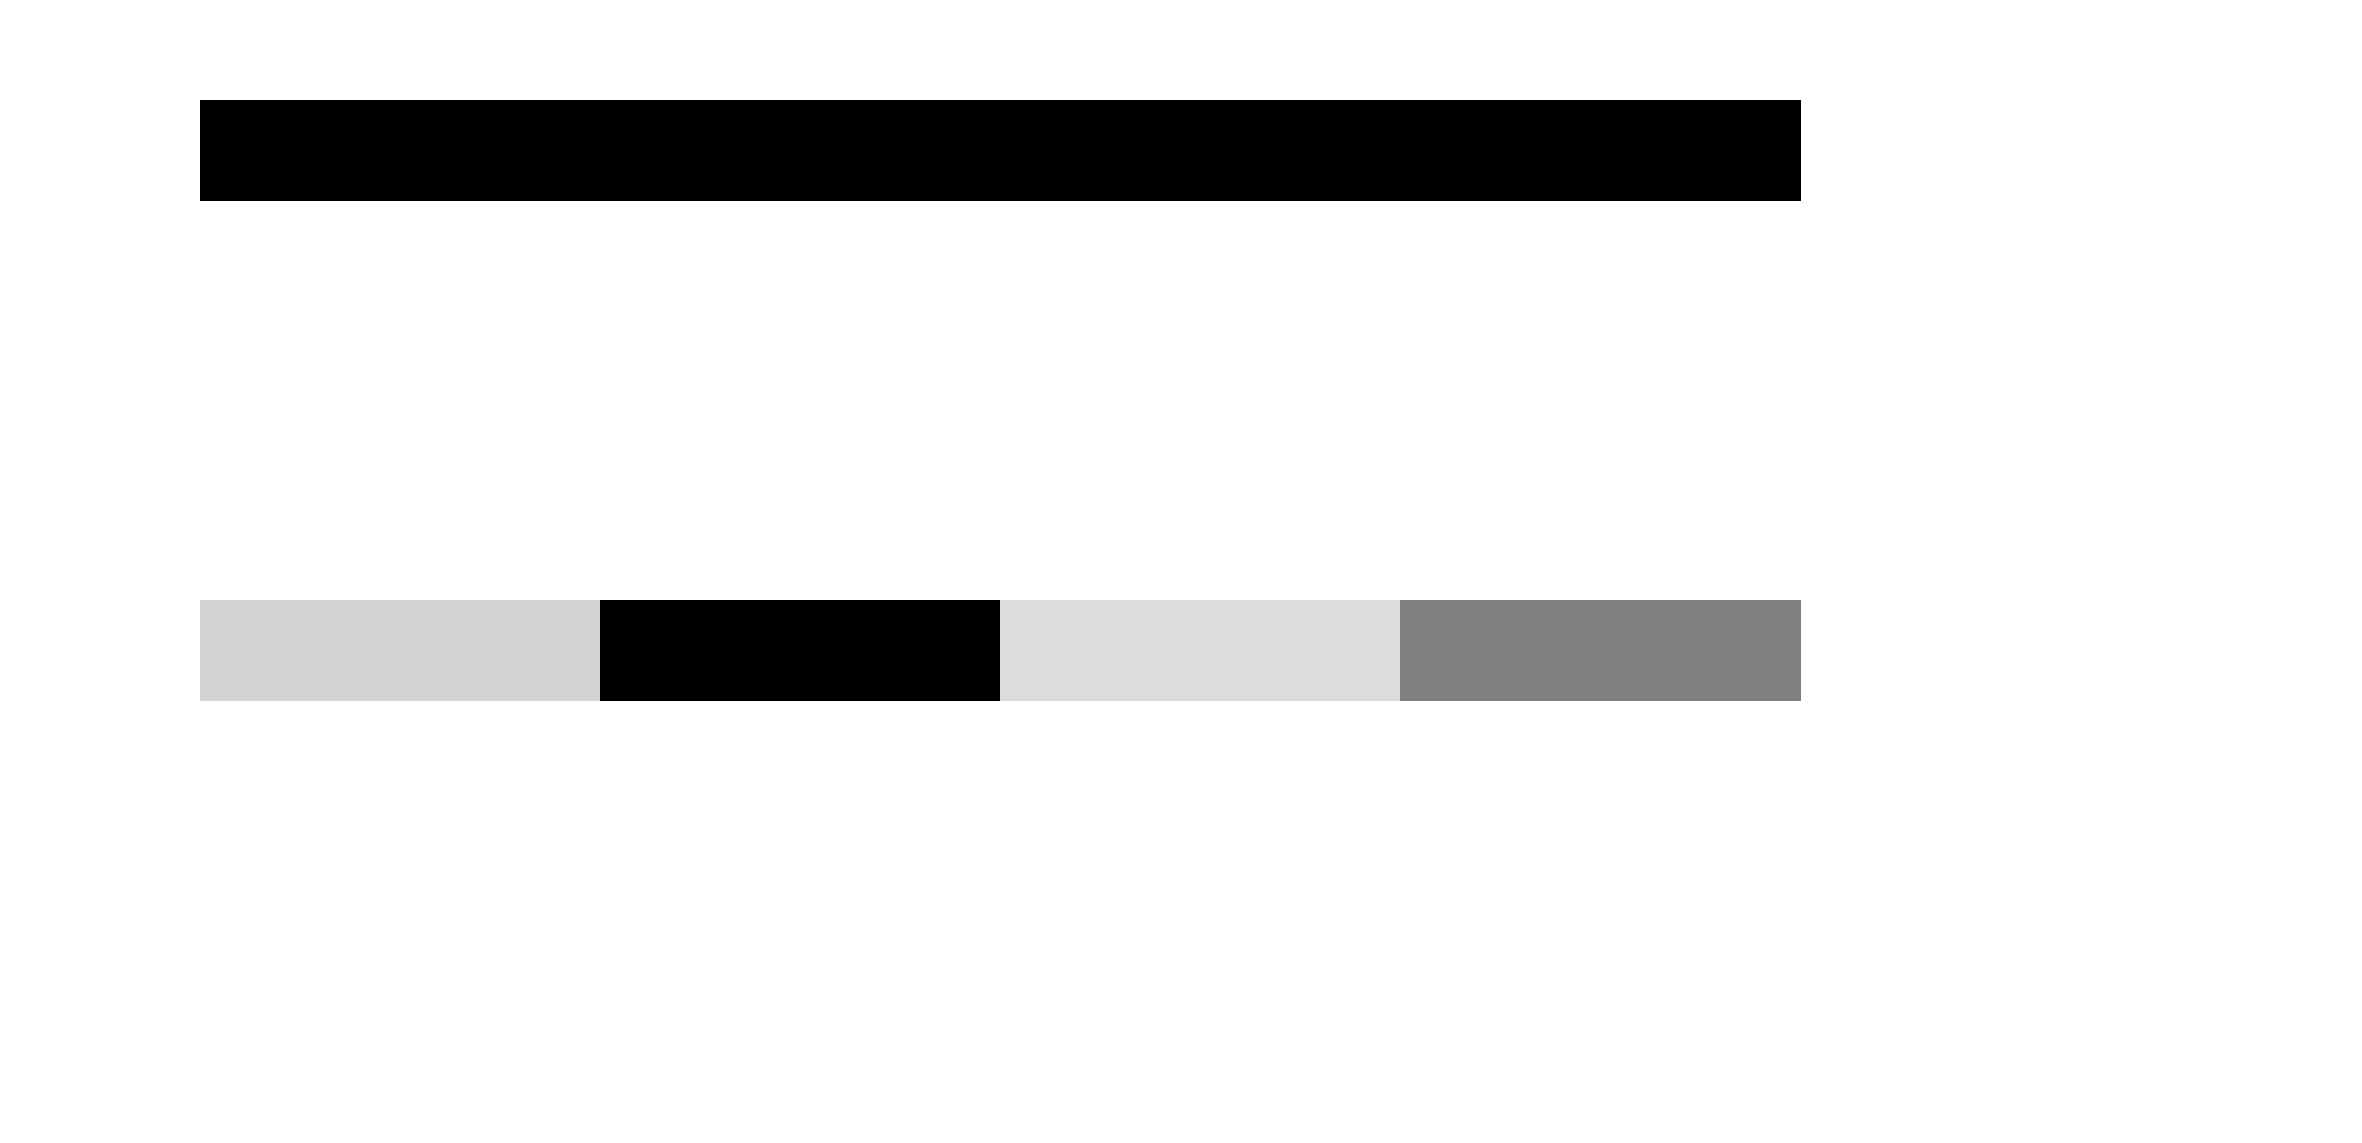

In [8]:
filename = '_backgrounds/_grey_and_black.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

striped_band = 600
long_band = 100
band_height = 100

left_origin = 200
band_width = 400

#Black band
draw.rectangle([(left_origin, long_band), (left_origin + 4 * band_width, long_band + band_height)], fill='black')

#Light grey / black / grey band
draw.rectangle([(left_origin, striped_band), (left_origin + band_width, striped_band + band_height)], fill='lightgrey')
draw.rectangle([(left_origin + band_width, striped_band), (left_origin + 2 * band_width, striped_band + band_height)], fill='black')
draw.rectangle([(left_origin + 2 * band_width, striped_band), (left_origin + 3 * band_width, striped_band + band_height)], fill='gainsboro')
draw.rectangle([(left_origin + 3 * band_width, striped_band), (left_origin + 4 * band_width, striped_band + band_height)], fill='grey')

img.save(filename)
I(filename)

## Square

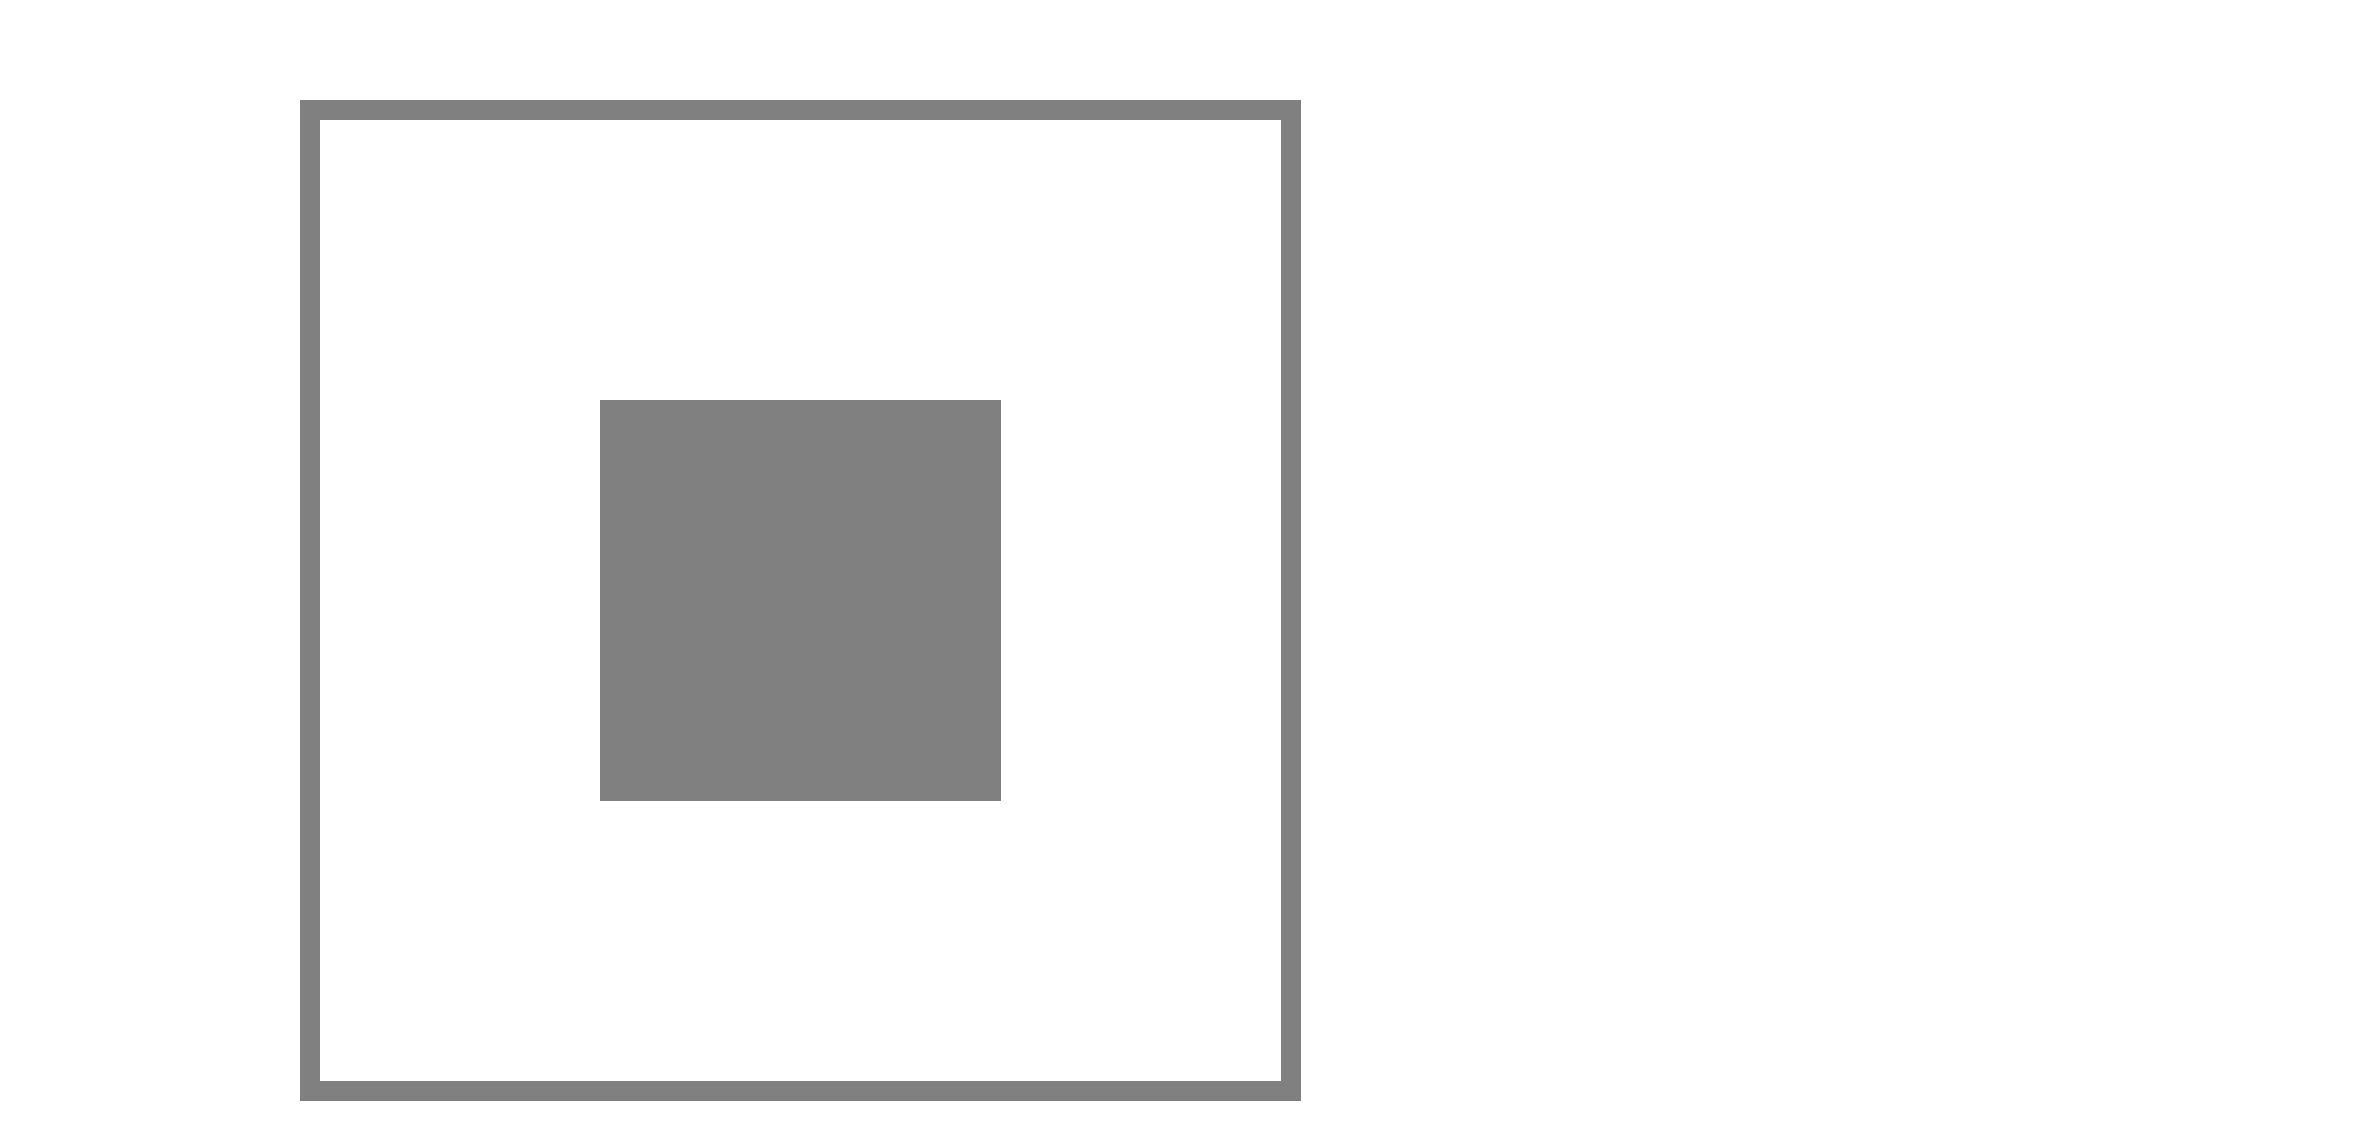

In [9]:
filename = '_backgrounds/_square.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

draw.rectangle([(600, 400), (1000, 800)], fill='grey')
  
draw.rectangle([(300, 100), (1300, 1100)], outline ="grey", width=20) 

img.save(filename)
I(filename)

## Loop

In [11]:
#https://stackoverflow.com/questions/7787375/python-imaging-library-pil-drawing-rounded-rectangle-with-gradient/50145023#50145023
#from PIL.ImageDraw import ImageDraw

def rounded_rectangle(self: ImageDraw, xy, corner_radius, fill=None, outline=None):
    upper_left_point = xy[0]
    bottom_right_point = xy[1]
    self.rectangle(
        [
            (upper_left_point[0], upper_left_point[1] + corner_radius),
            (bottom_right_point[0], bottom_right_point[1] - corner_radius)
        ],
        fill=fill,
        outline=outline
    )
    self.rectangle(
        [
            (upper_left_point[0] + corner_radius, upper_left_point[1]),
            (bottom_right_point[0] - corner_radius, bottom_right_point[1])
        ],
        fill=fill,
        outline=outline
    )
    self.pieslice([upper_left_point, (upper_left_point[0] + corner_radius * 2, upper_left_point[1] + corner_radius * 2)],
        180,
        270,
        fill=fill,
        outline=outline
    )
    self.pieslice([(bottom_right_point[0] - corner_radius * 2, bottom_right_point[1] - corner_radius * 2), bottom_right_point],
        0,
        90,
        fill=fill,
        outline=outline
    )
    self.pieslice([(upper_left_point[0], bottom_right_point[1] - corner_radius * 2), (upper_left_point[0] + corner_radius * 2, bottom_right_point[1])],
        90,
        180,
        fill=fill,
        outline=outline
    )
    self.pieslice([(bottom_right_point[0] - corner_radius * 2, upper_left_point[1]), (bottom_right_point[0], upper_left_point[1] + corner_radius * 2)],
        270,
        360,
        fill=fill,
        outline=outline
    )


ImageDraw.ImageDraw.rounded_rectangle = rounded_rectangle


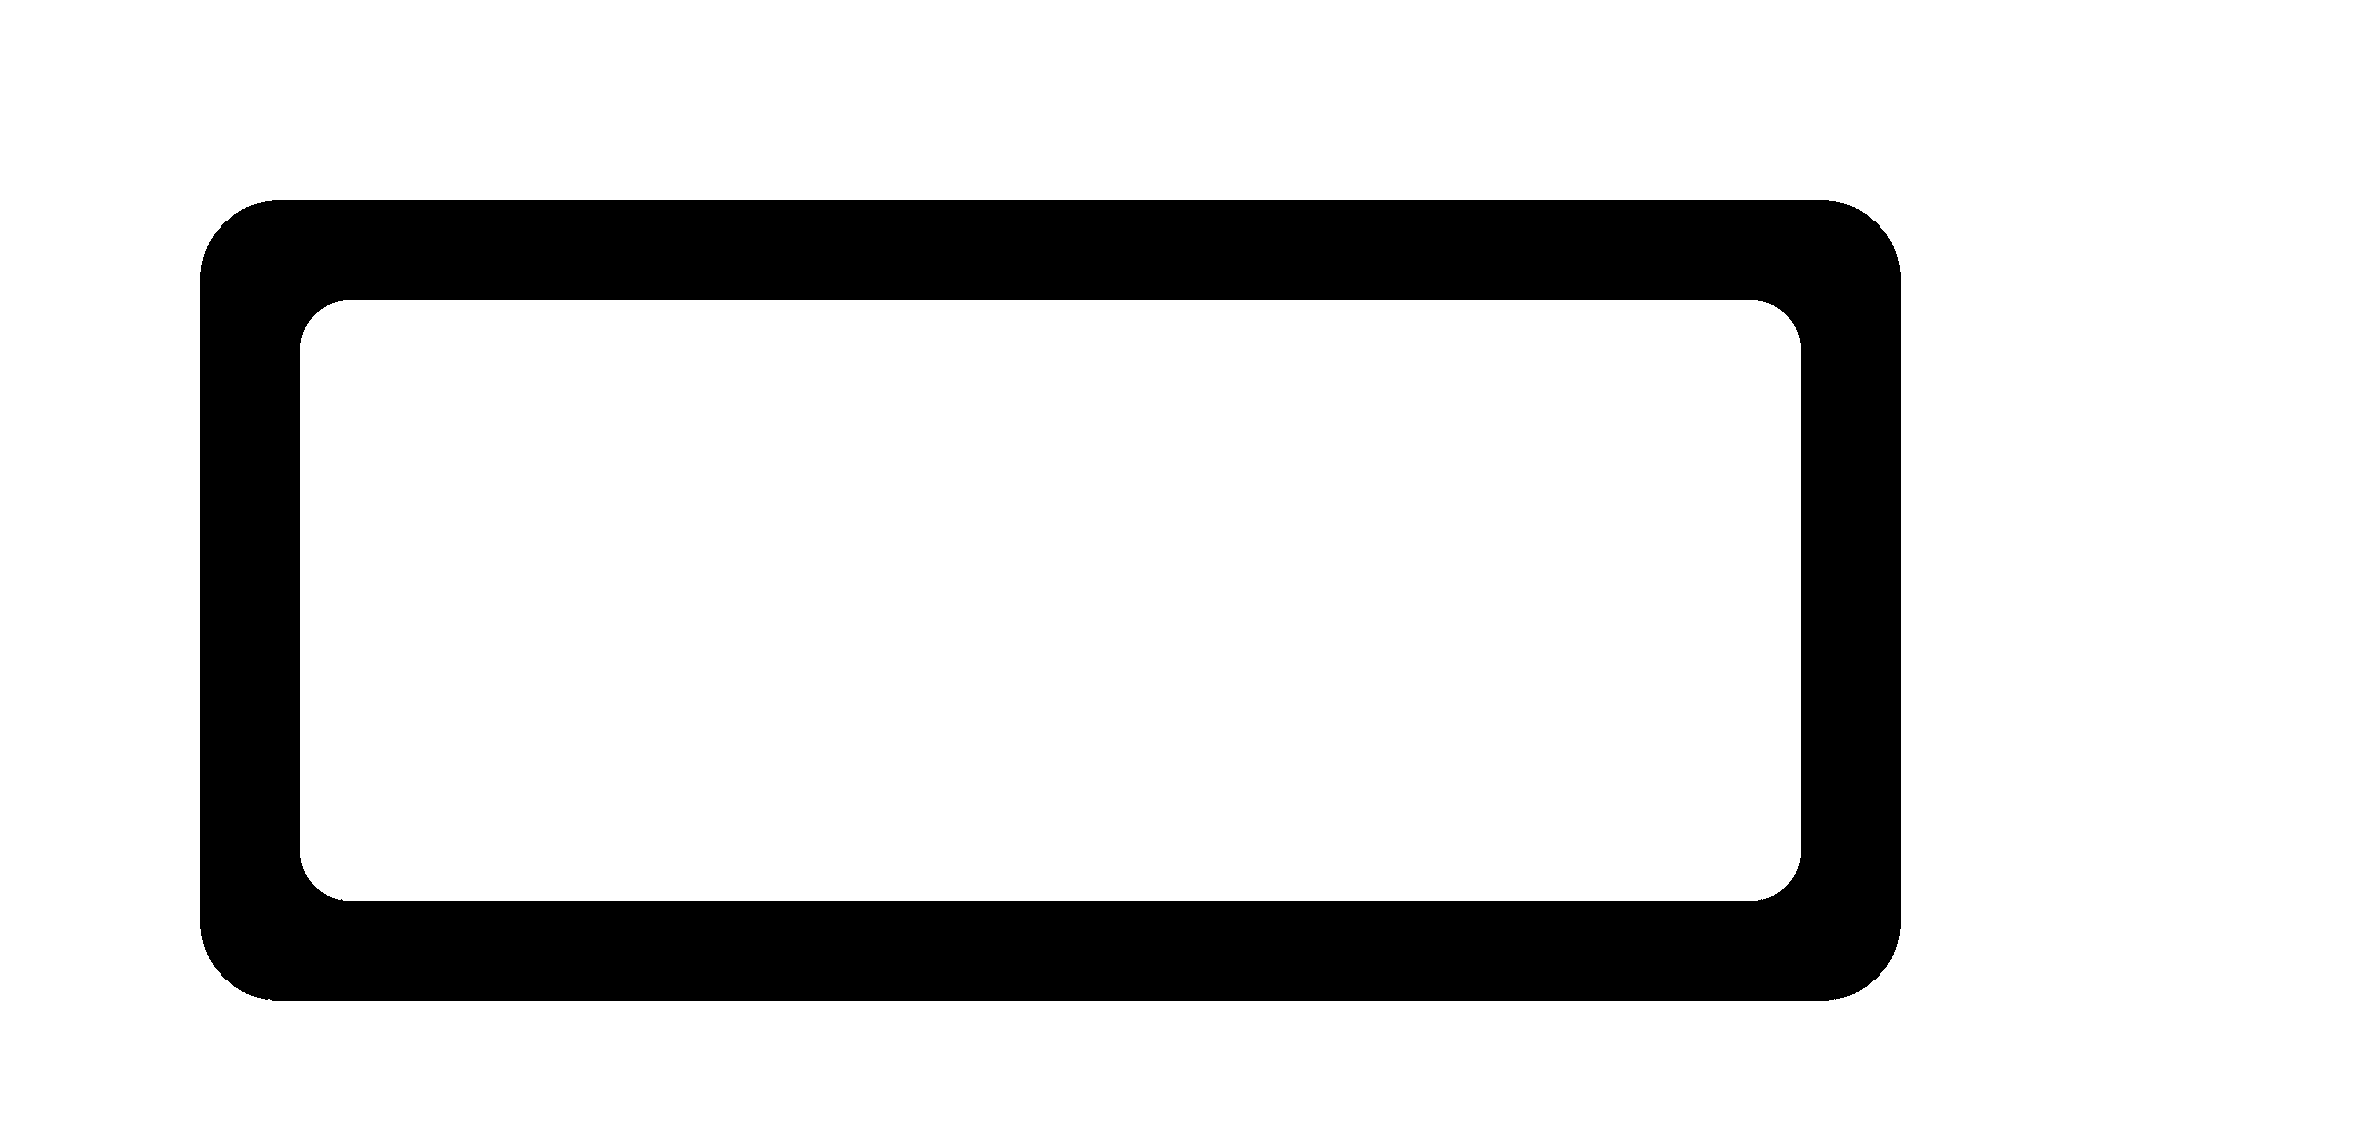

In [12]:
filename = '_backgrounds/_loop.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)
draw.rounded_rectangle([(200, 200), (1900, 1000)], 80, fill='black')
draw.rounded_rectangle([(300, 300), (1800, 900)], 50, fill='white')
img.save(filename)
I(filename)

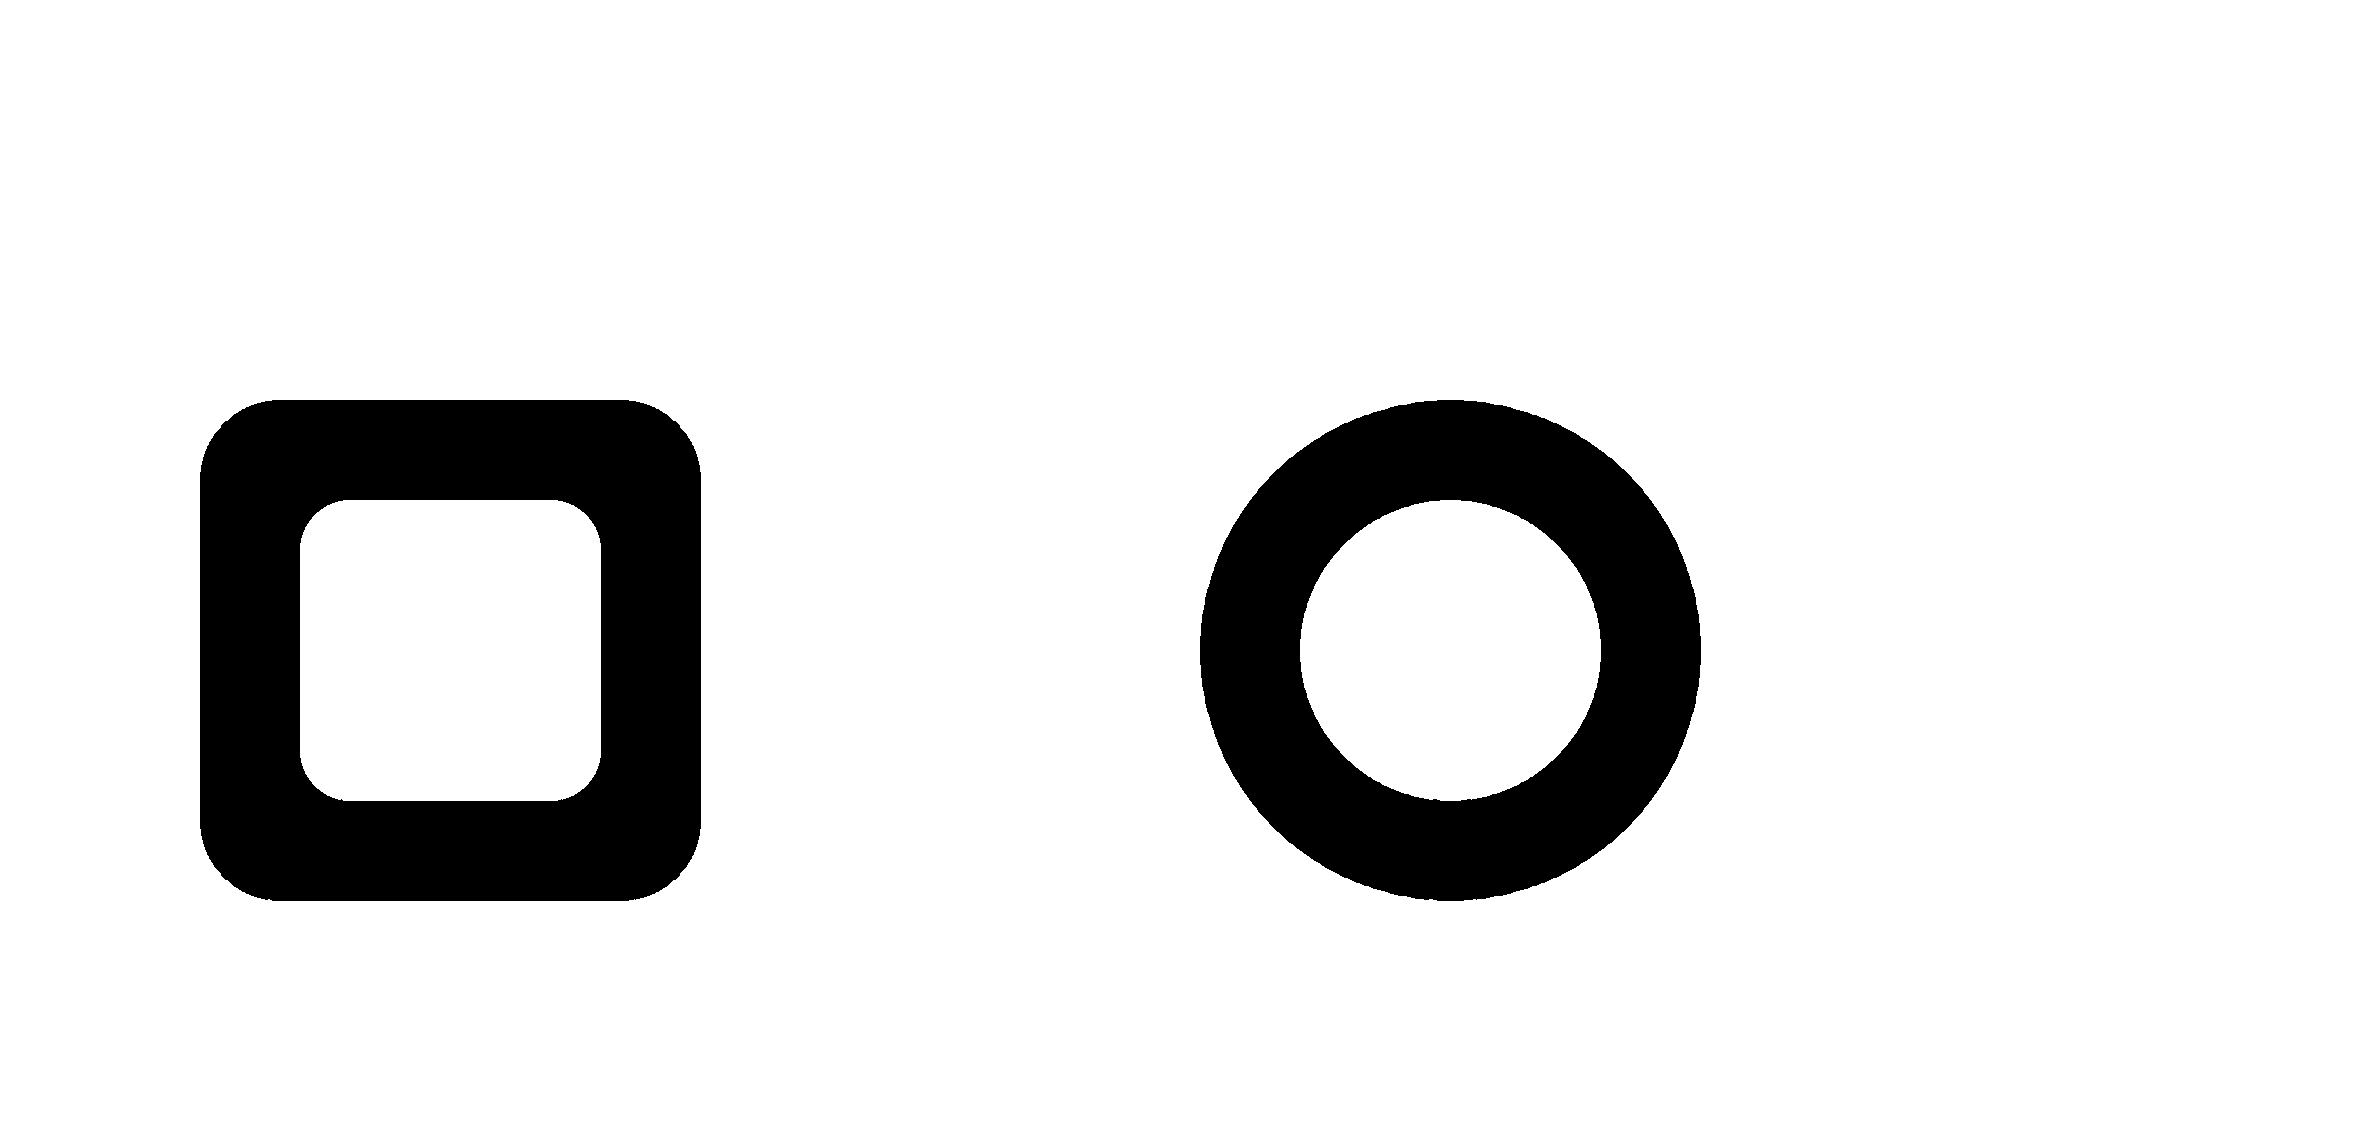

In [13]:
filename = '_backgrounds/_two_shapes.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)
draw.rounded_rectangle([(200, 400), (700, 900)], 80, fill='black')
draw.rounded_rectangle([(300, 500), (600, 800)], 50, fill='white')


outline = 100 # line thickness
draw.ellipse((1200, 400, 1700, 900), fill='black')
draw.ellipse((1200+outline, 400+outline, 1700-outline, 900-outline), fill='white')

img.save(filename)
I(filename)

## Linear Gradient

A graduated grey background that is black at the bottom and white at the top.

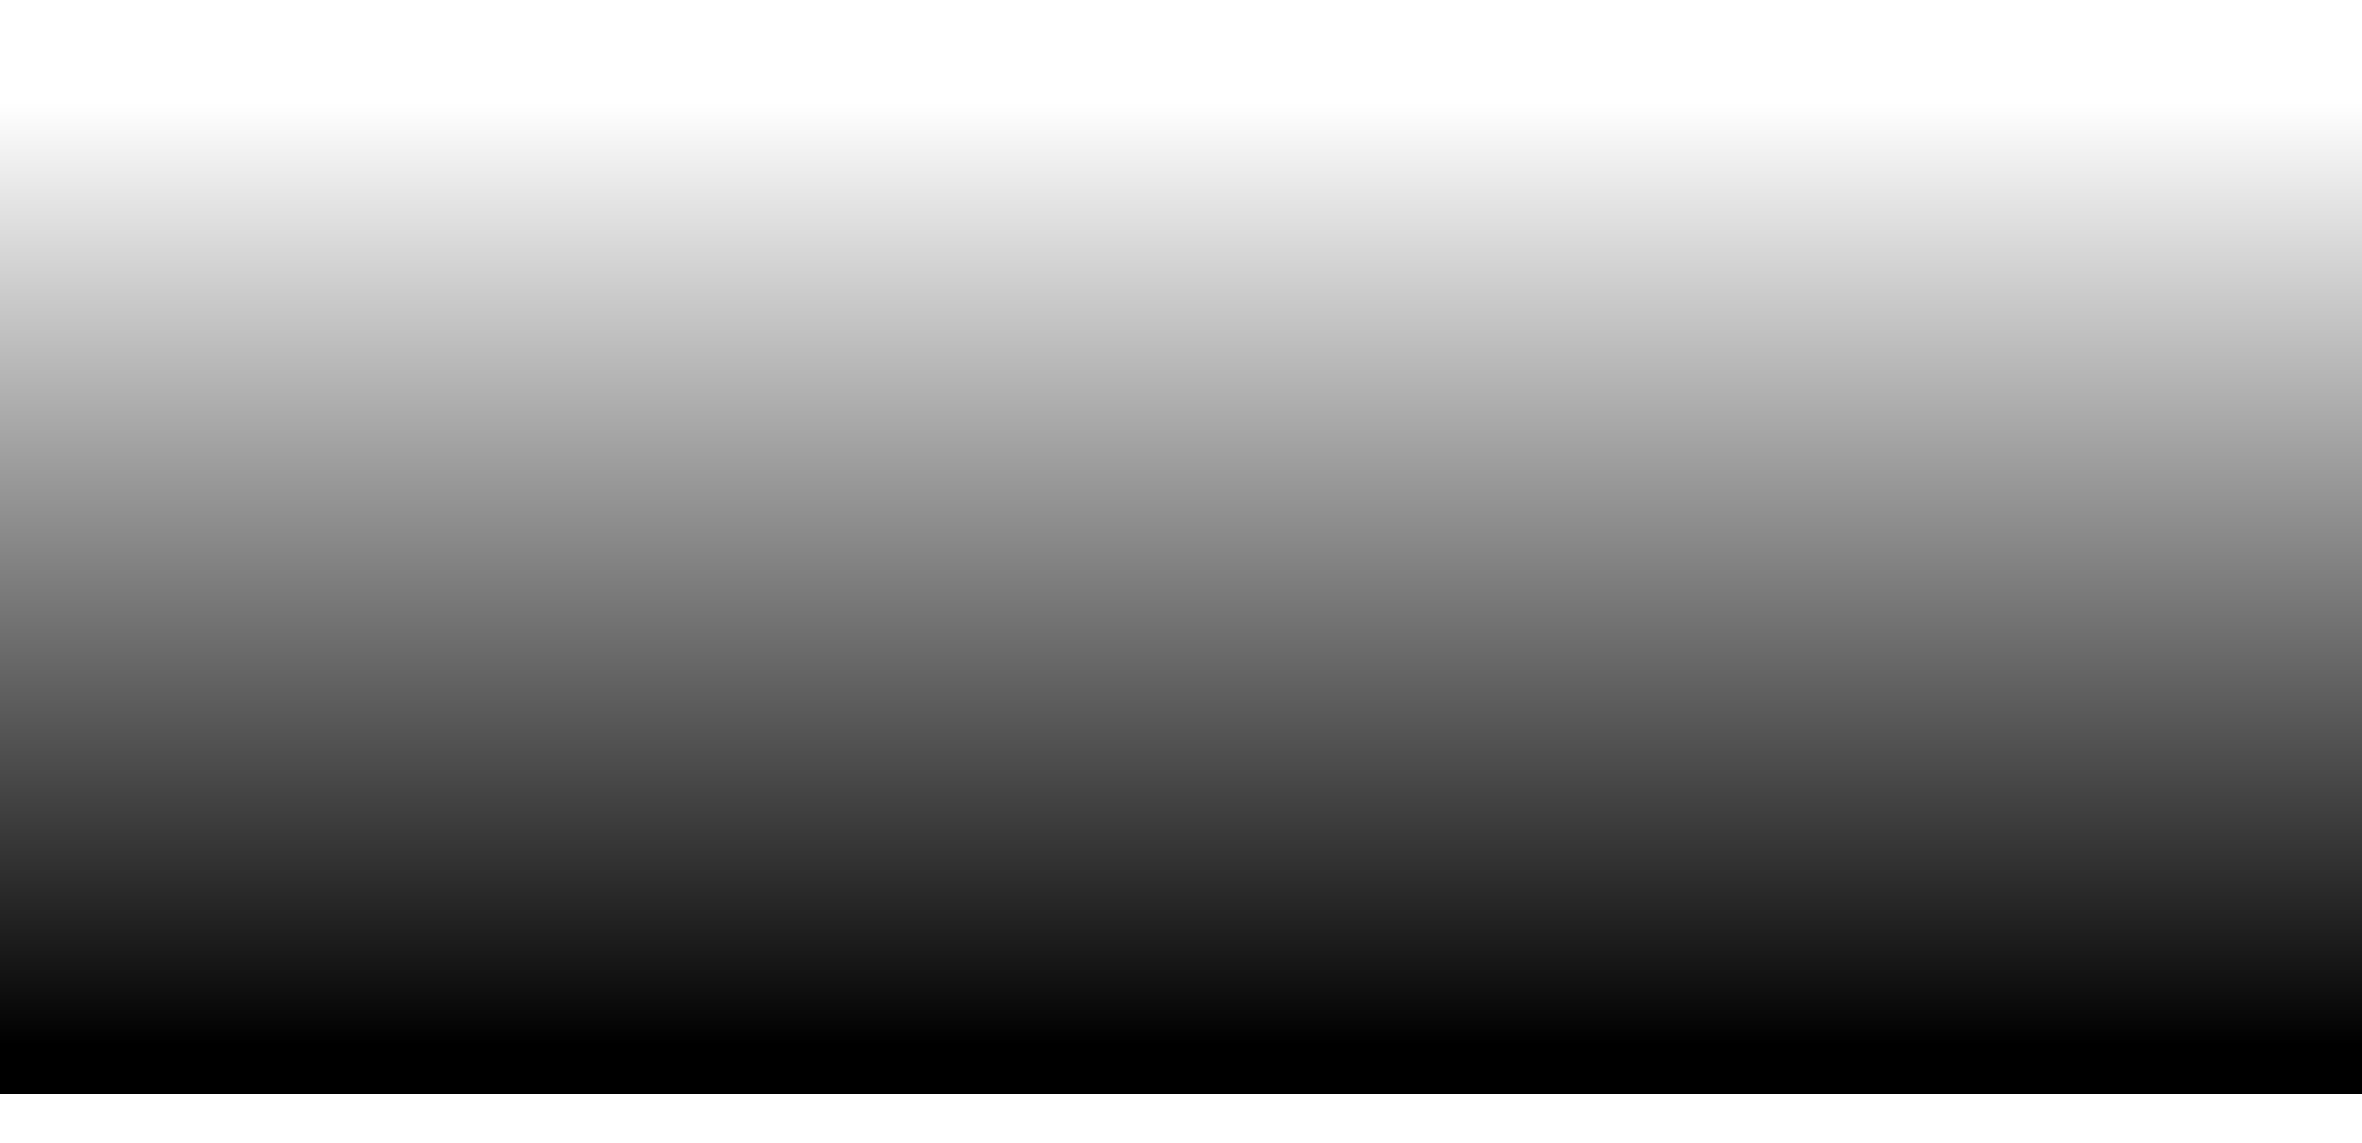

In [10]:
filename = '_backgrounds/_linear_grey.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

# White edge
draw.line([0, 100, size[0], 100], width=100, fill=(255,255,255))
#Black edge
draw.line([0, size[1]-100, size[0], size[1]-100], width=100, fill=(0,0,0))


_scaler = (size[1]-200)/256
for y in range(100, (size[1]-100)):
    _y = 255-int(255*(y-100)/(size[1]-200))
    draw.line([0, y, size[0], y], width=1, fill=(_y,_y,_y))


img.save(filename)

I(filename)

## Radial Gradient (Braitenberg)

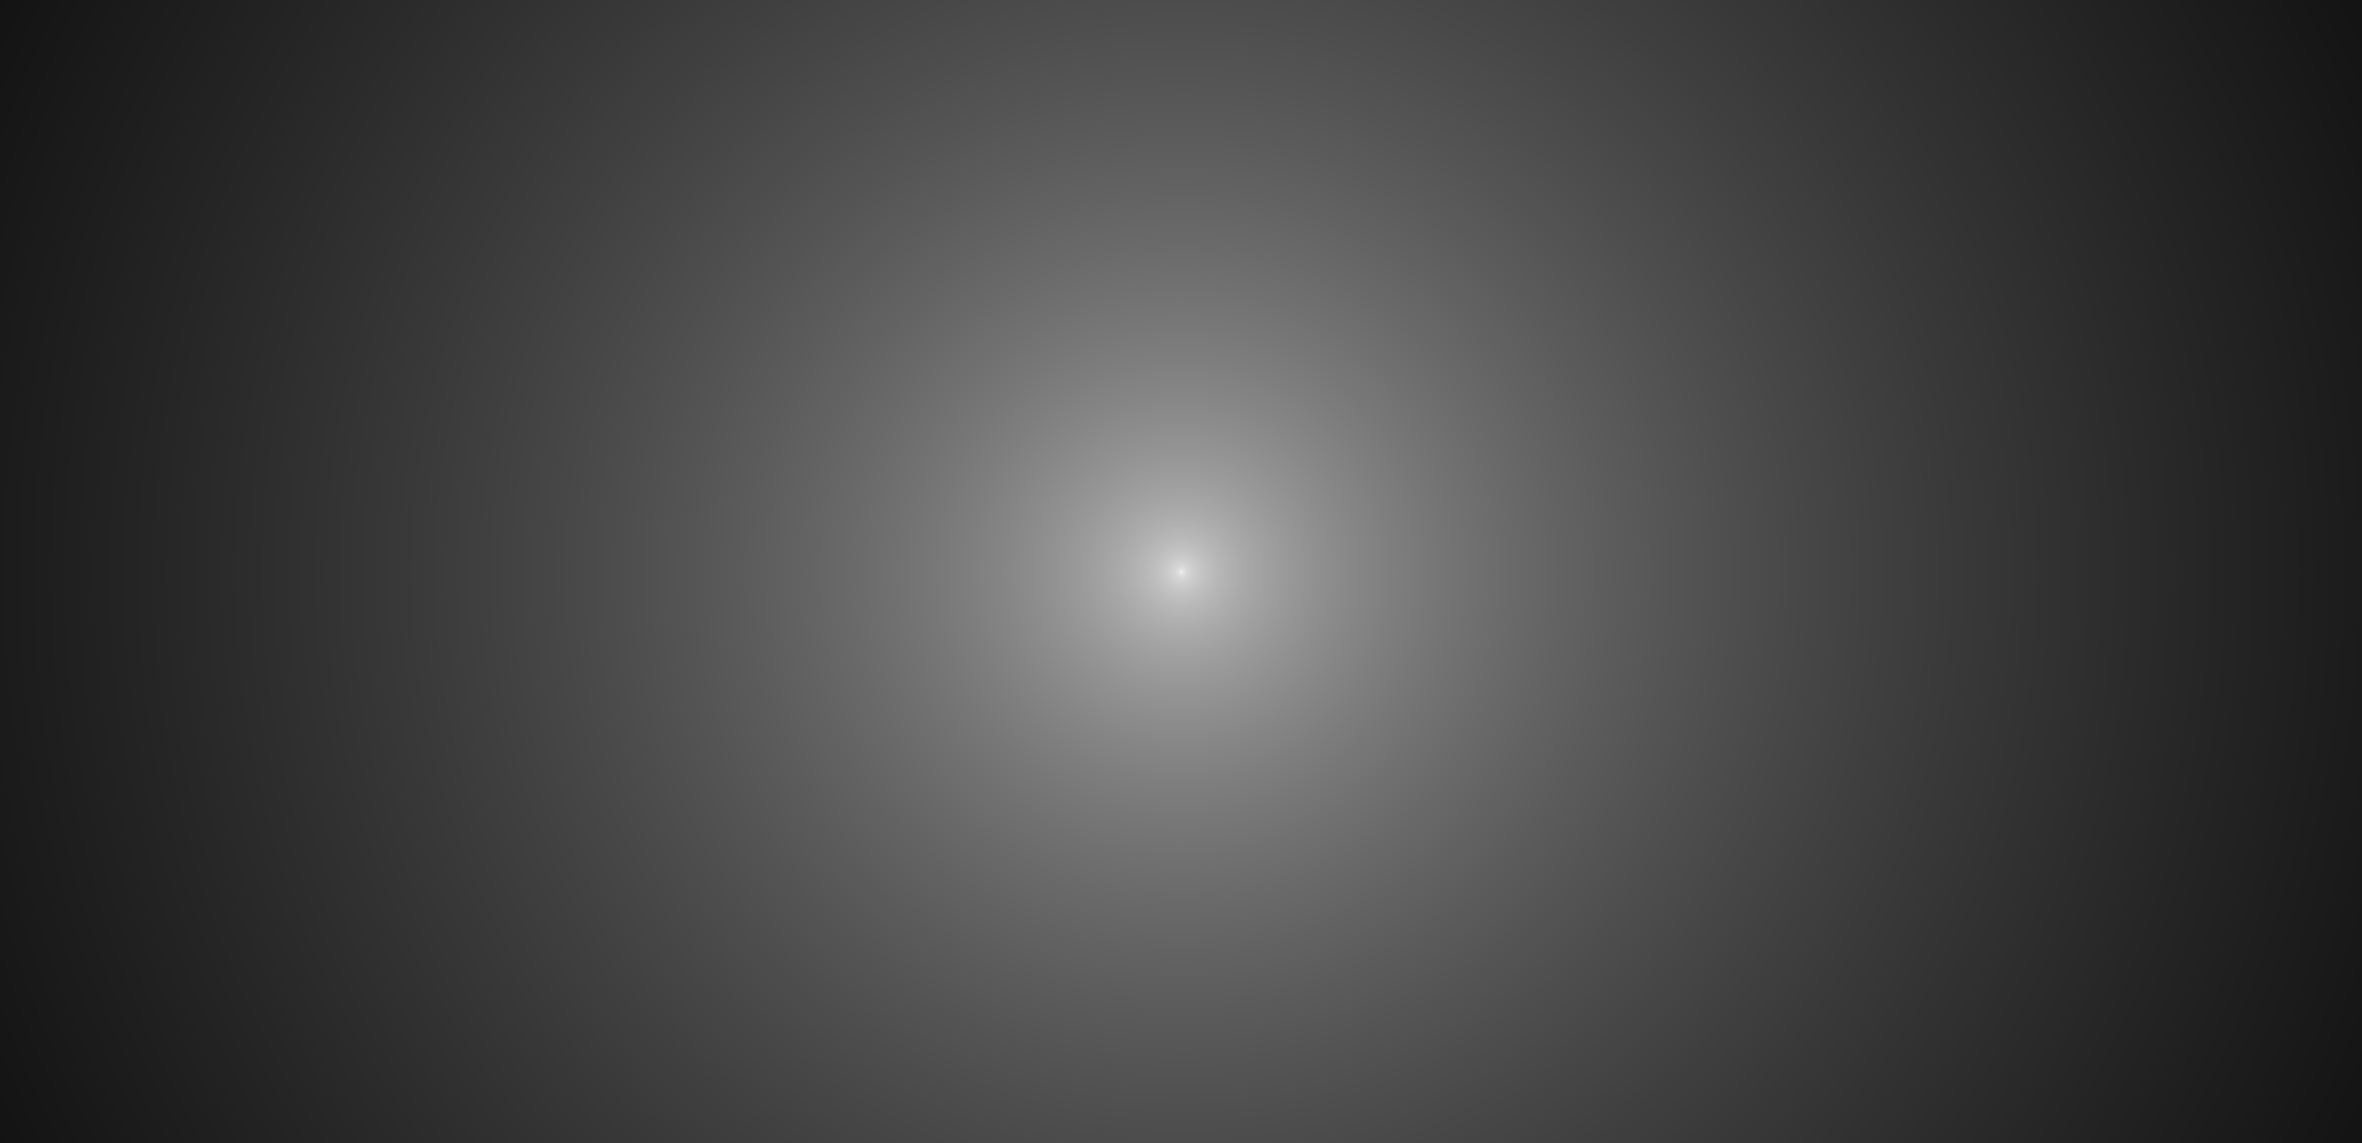

In [11]:
import math

img = Image.new(mode, size, color)


innerBlue = [80, 80, 255] #Color at the center
outerBlue = [0, 0, 80] #Color at the corners
blues = ('_backgrounds/_radial_blue.png', innerBlue, outerBlue)

innerRed = [255, 80, 80] #Color at the center
outerRed = [80, 0, 0] #Color at the corners
reds = (_backgrounds/'_radial_red.png', innerRed, outerRed)

innerGrey = [255, 255, 255] #Color at the center
outerGrey = [0, 0, 0] #Color at the corners
greys = ('_backgrounds/_radial_grey.png', innerGrey, outerGrey)


#https://stackoverflow.com/a/30669765/454773
def radial(img, radial_config):
    """Generate a radial gradient image."""
    (filename, innerColor, outerColor) = radial_config
    for y in range(size[1]):
        for x in range(size[0]):

            #Find the distance to the center
            distanceToCenter = math.sqrt((x - size[0]/2) ** 2 + (y - size[1]/2) ** 2)

            #Make it on a scale from 0 to 1
            distanceToCenter = float(distanceToCenter) / (math.sqrt(2) * size[0]/2)

            #Make non-linear
            #distanceToCenter = math.sqrt(distanceToCenter)
            distanceToCenter = distanceToCenter**(1./3.)
            
            #Calculate r, g, and b values
            r = outerColor[0] * distanceToCenter + innerColor[0] * (1 - distanceToCenter)
            g = outerColor[1] * distanceToCenter + innerColor[1] * (1 - distanceToCenter)
            b = outerColor[2] * distanceToCenter + innerColor[2] * (1 - distanceToCenter)

            #Place the pixel        
            img.putpixel((x, y), (int(r), int(g), int(b))) 
    
    img.save(filename)
    return filename, img

filename, _ = radial(img, blues)
I(filename)

filename, _ = radial(img, reds)
I(filename)

filename, _ = radial(img, greys)
I(filename)

## Line Follower

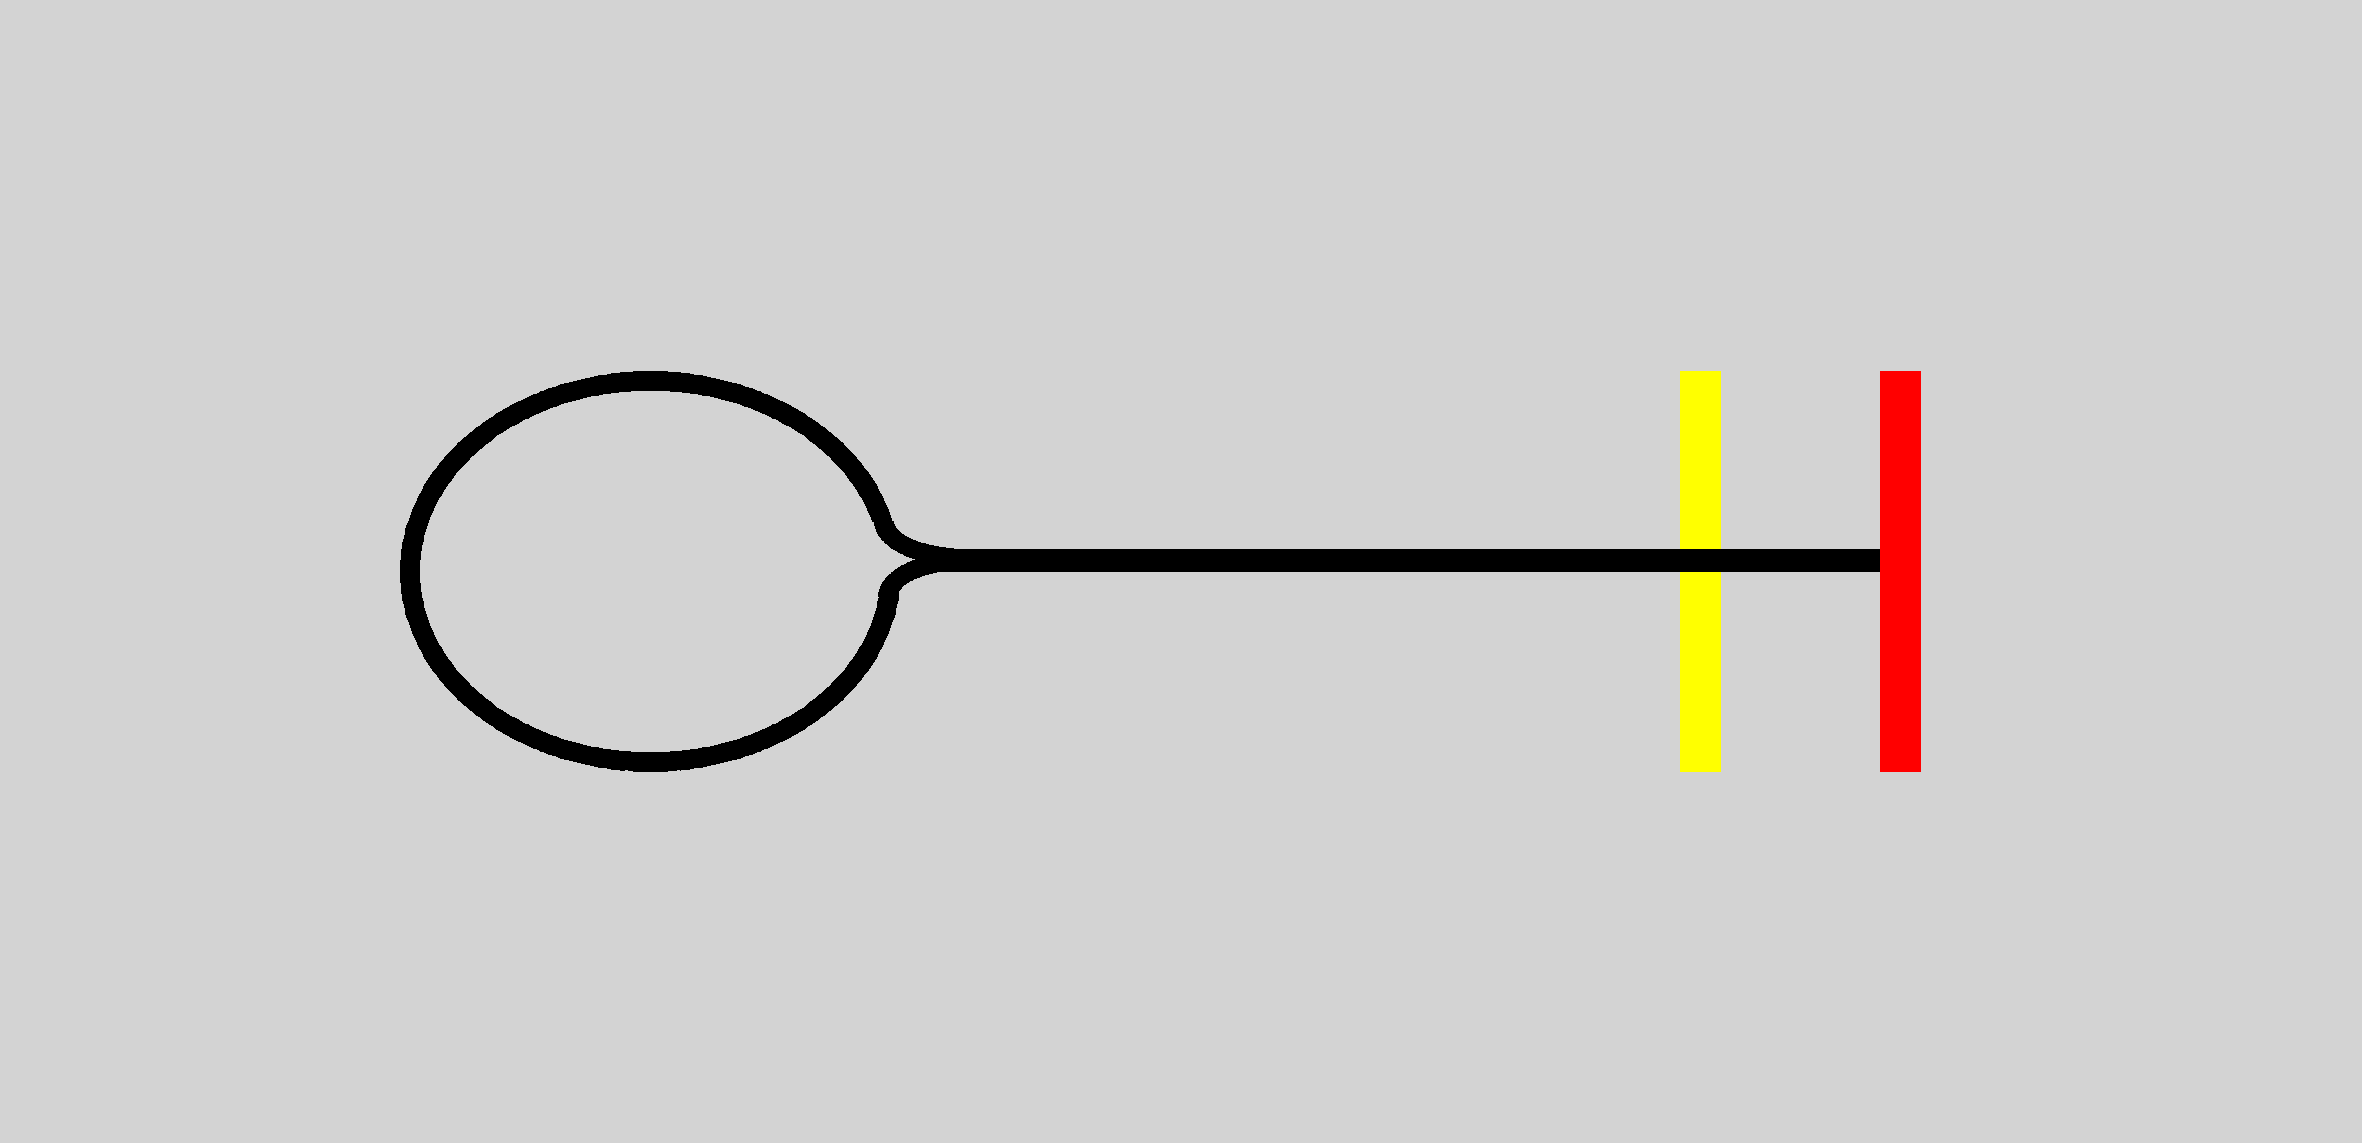

In [2]:
filename = '_backgrounds/_line_follower_track.png'

img = Image.new(mode, size, 'lightgrey')
draw = ImageDraw.Draw(img)

x, y =  img.size
#Size of Bounding Box for ellipse
eX, eY = 1000, 400

inset = 400
outerBox =  (inset, y/2 - eY/2, inset + eX/2, y/2 + eY/2)
exitBox1 = (inset - 20 + eX/2, y/2 + -100, 4000 + eX/2, y/2 + 50 )
exitBox2 = (inset - 18 + eX/2, y/2 + -100, 4000 + eX/2, y/2 + 100 )

draw.ellipse(outerBox, outline ="black", width=20)

draw.rectangle((inset + eX/2 - 40, y/2 - 49, inset + eX/2 + 20, y/2+22), fill='lightgrey')


_ly = -22
_lx = -22
_lh = 95
_lo = -75

# Arc: bounding box, start angle, end angle
draw.arc((inset + _lx + eX/2, y/2 + _ly,
          inset + _lx + eX/2 + 200, y/2 + _ly + _lh ),
         start = 180, end = 270, width=20, fill ="black")
draw.arc((inset + _lx + eX/2 - 4, y/2 + _ly + _lo,
          inset + _lx + eX/2 + 200, y/2 + _ly + _lh + _lo),
         start = 90, end = 180, width=20, fill ="black")

# This needs fixing properly / relatively; maybe even some sums!
draw.rectangle((1700 - 20, y/2 - 200, 1700 + 20, y/2 + 200), fill ="yellow") 
draw.rectangle((inset + eX/2 +15, y/2 - 22, 1900, y/2), fill ="black") 
draw.rectangle((1900 - 20, y/2 - 200, 1900 + 20, y/2 + 200), fill ="red") 
 

#draw.rectangle([(800, 300), (1000, 900)], fill='gainsboro')
img.save(filename)
I(filename)

Note: you may need to restart the kernel to use updated packages.


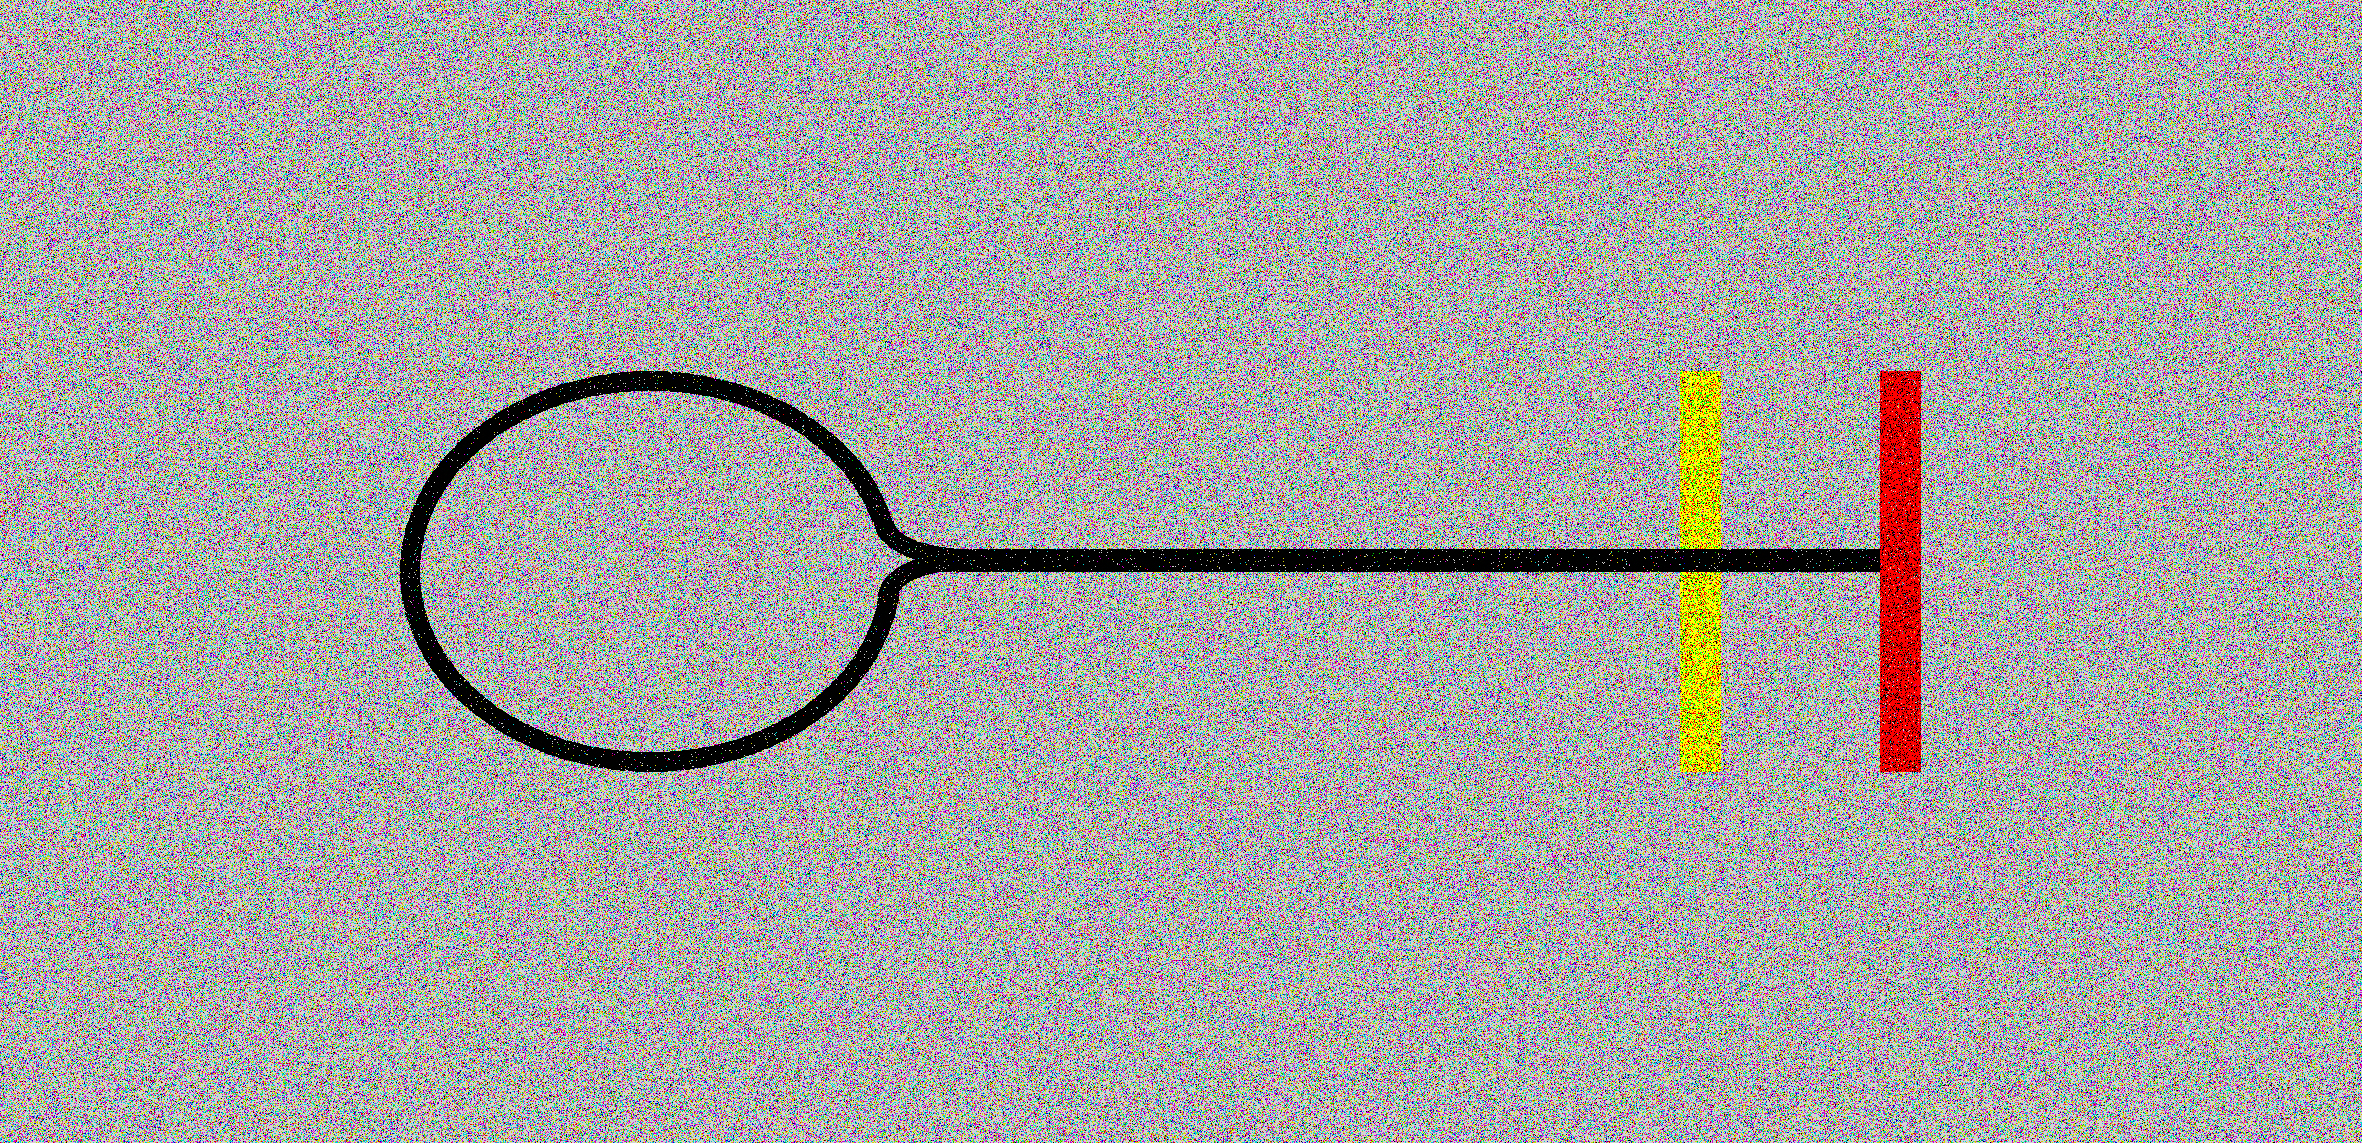

In [3]:
%pip install noisify
from noisify.recipes import human_error, machine_error
combined_noise = machine_error(20) + human_error(15)
[i for i in combined_noise(img)][0]

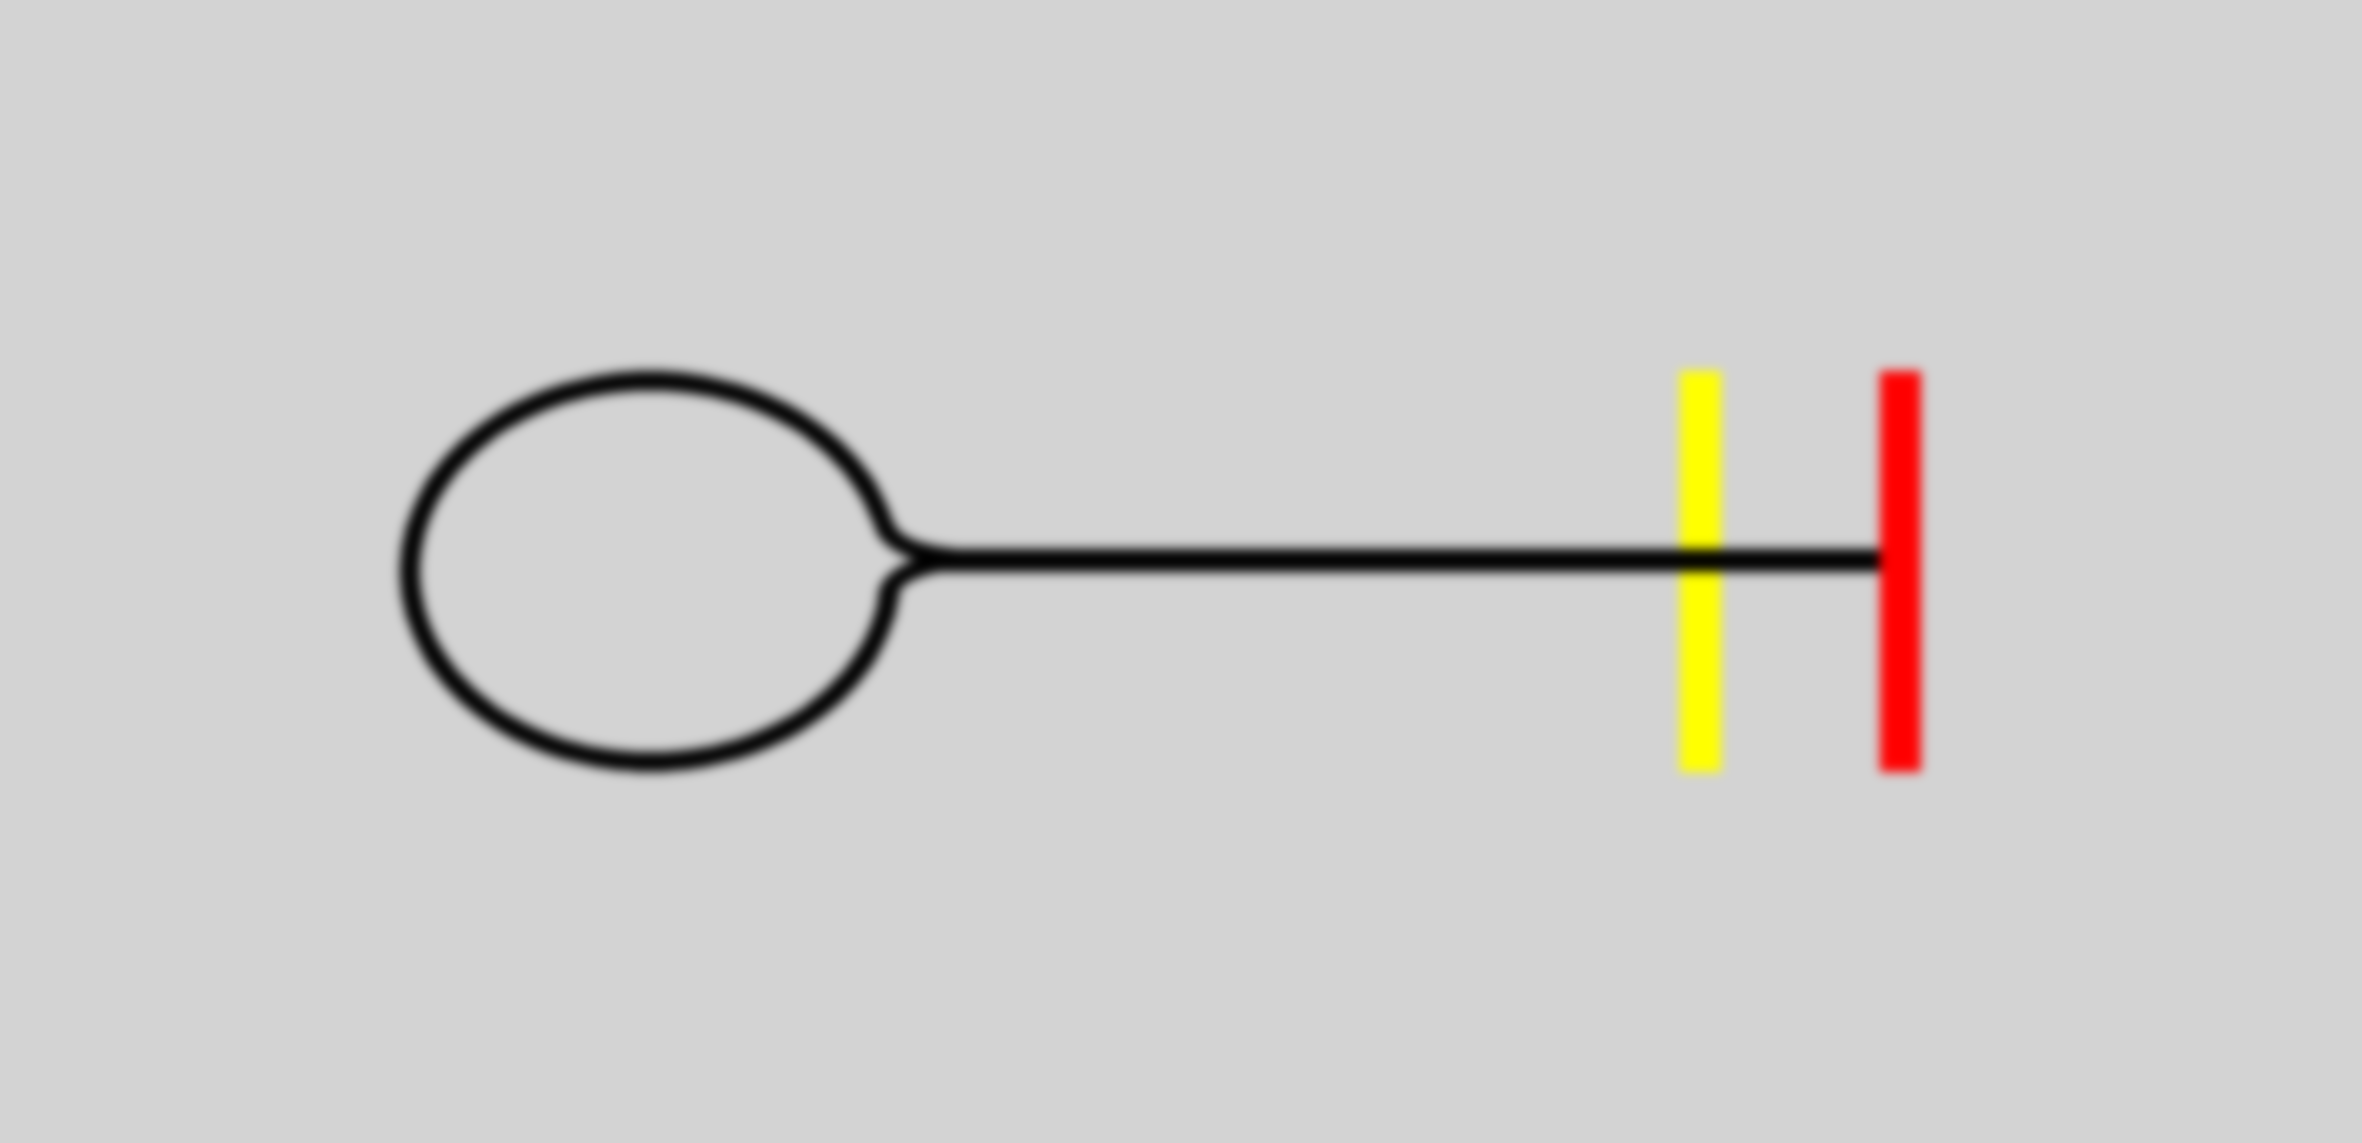

In [4]:
from PIL import ImageFilter
tmp = img
for i in range(10):
    tmp = tmp.filter(ImageFilter.BLUR) # BLUR, SMOOTH

tmp


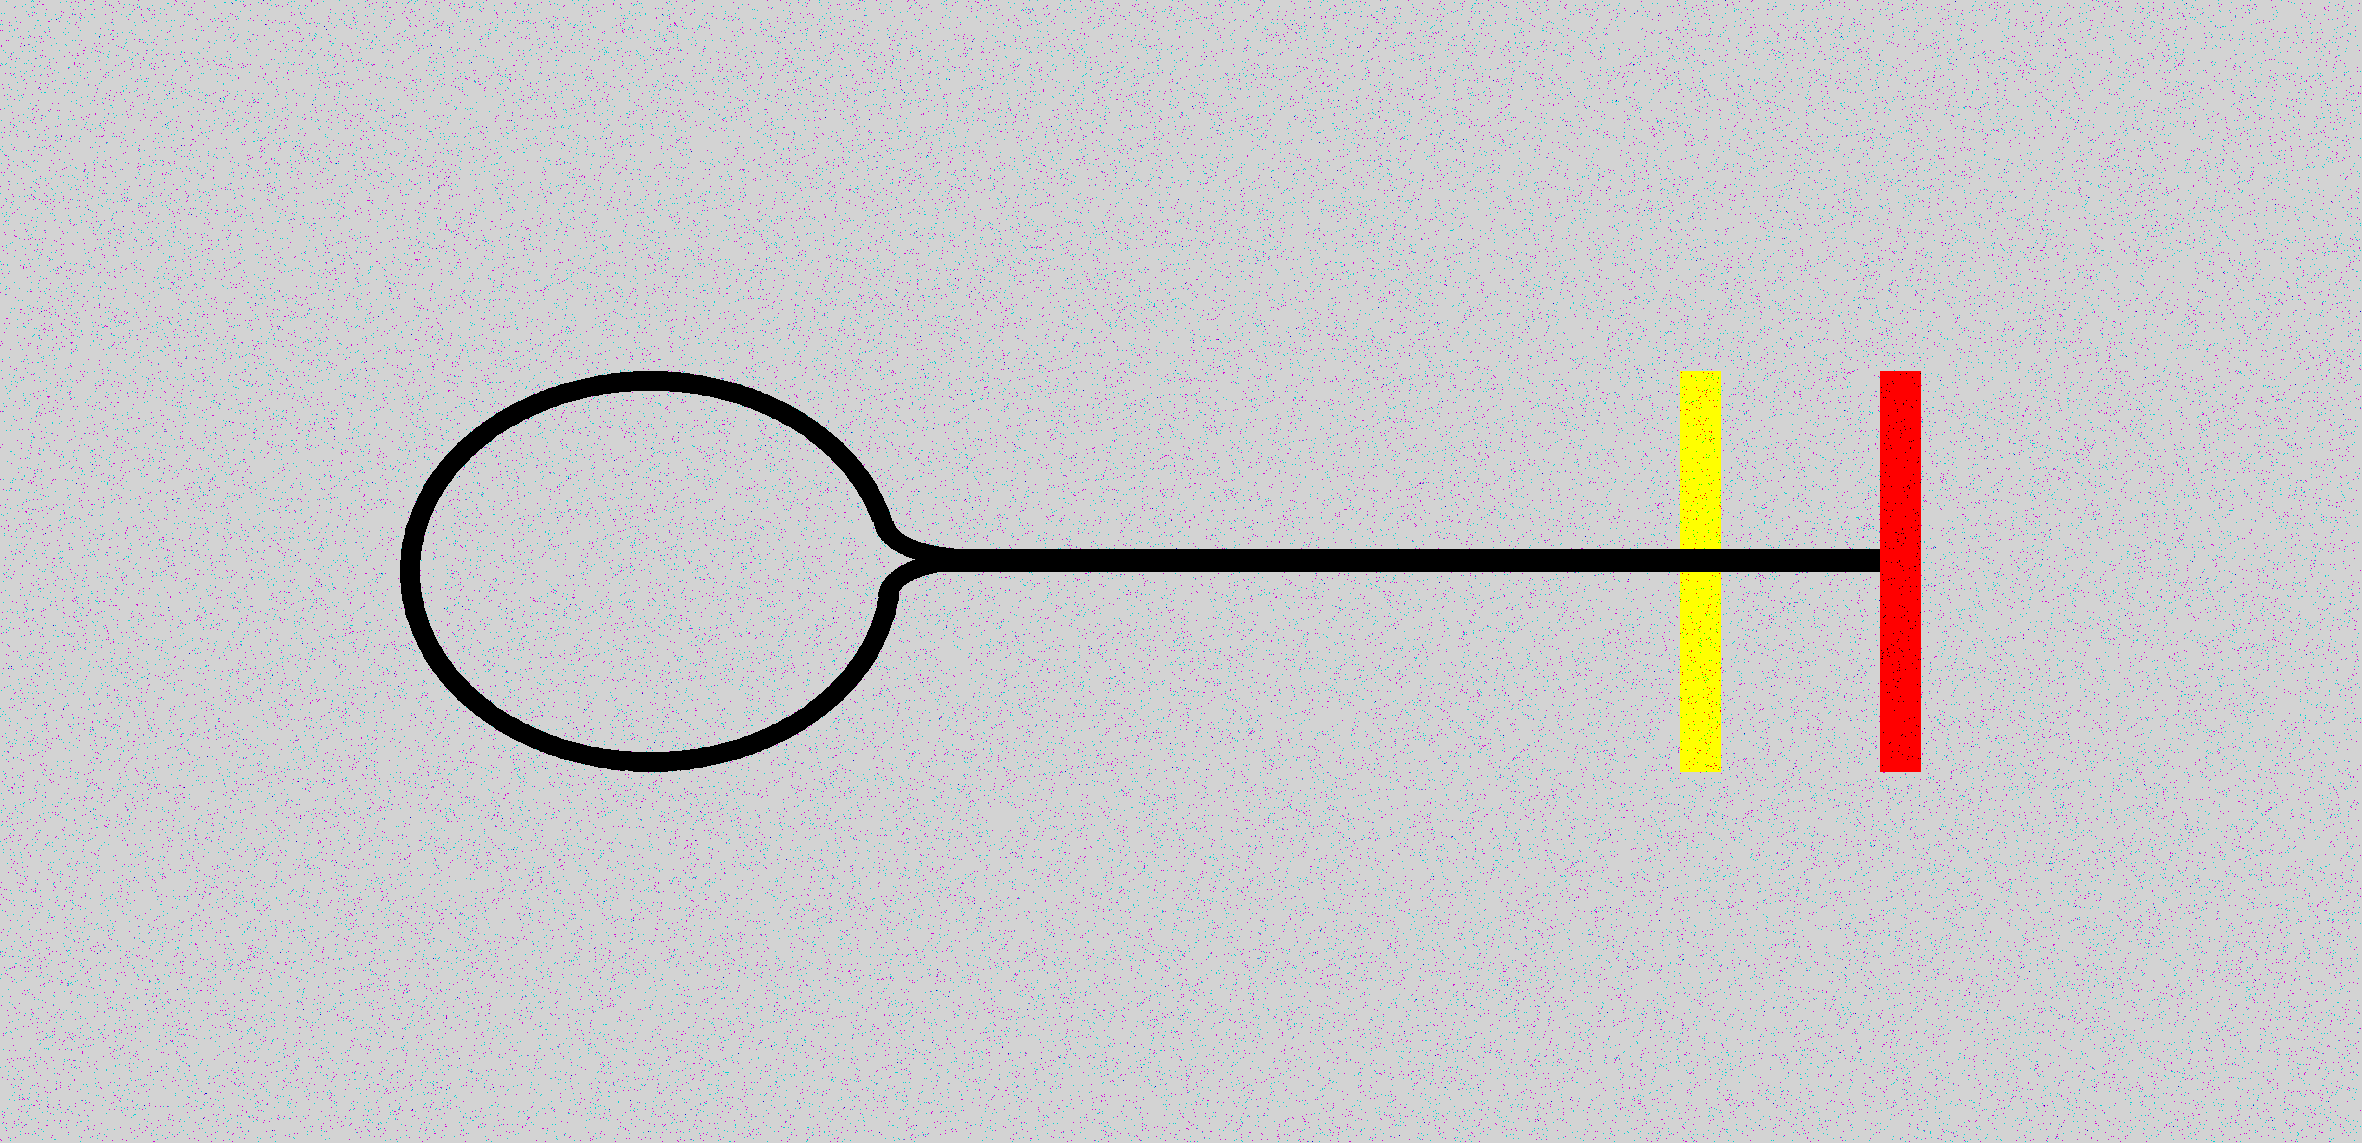

In [8]:
#https://stackoverflow.com/a/59991417/454773
import numpy as np
def add_salt_and_pepper(image, amount):

    output = np.copy(np.array(image))

    # add salt
    nb_salt = np.ceil(amount * output.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(nb_salt)) for i in output.shape]
    output[tuple(coords)] = 1

    # add pepper
    nb_pepper = np.ceil(amount* output.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(nb_pepper)) for i in output.shape]
    output[tuple(coords)] = 0

    return Image.fromarray(output)

add_salt_and_pepper(img,0.01)

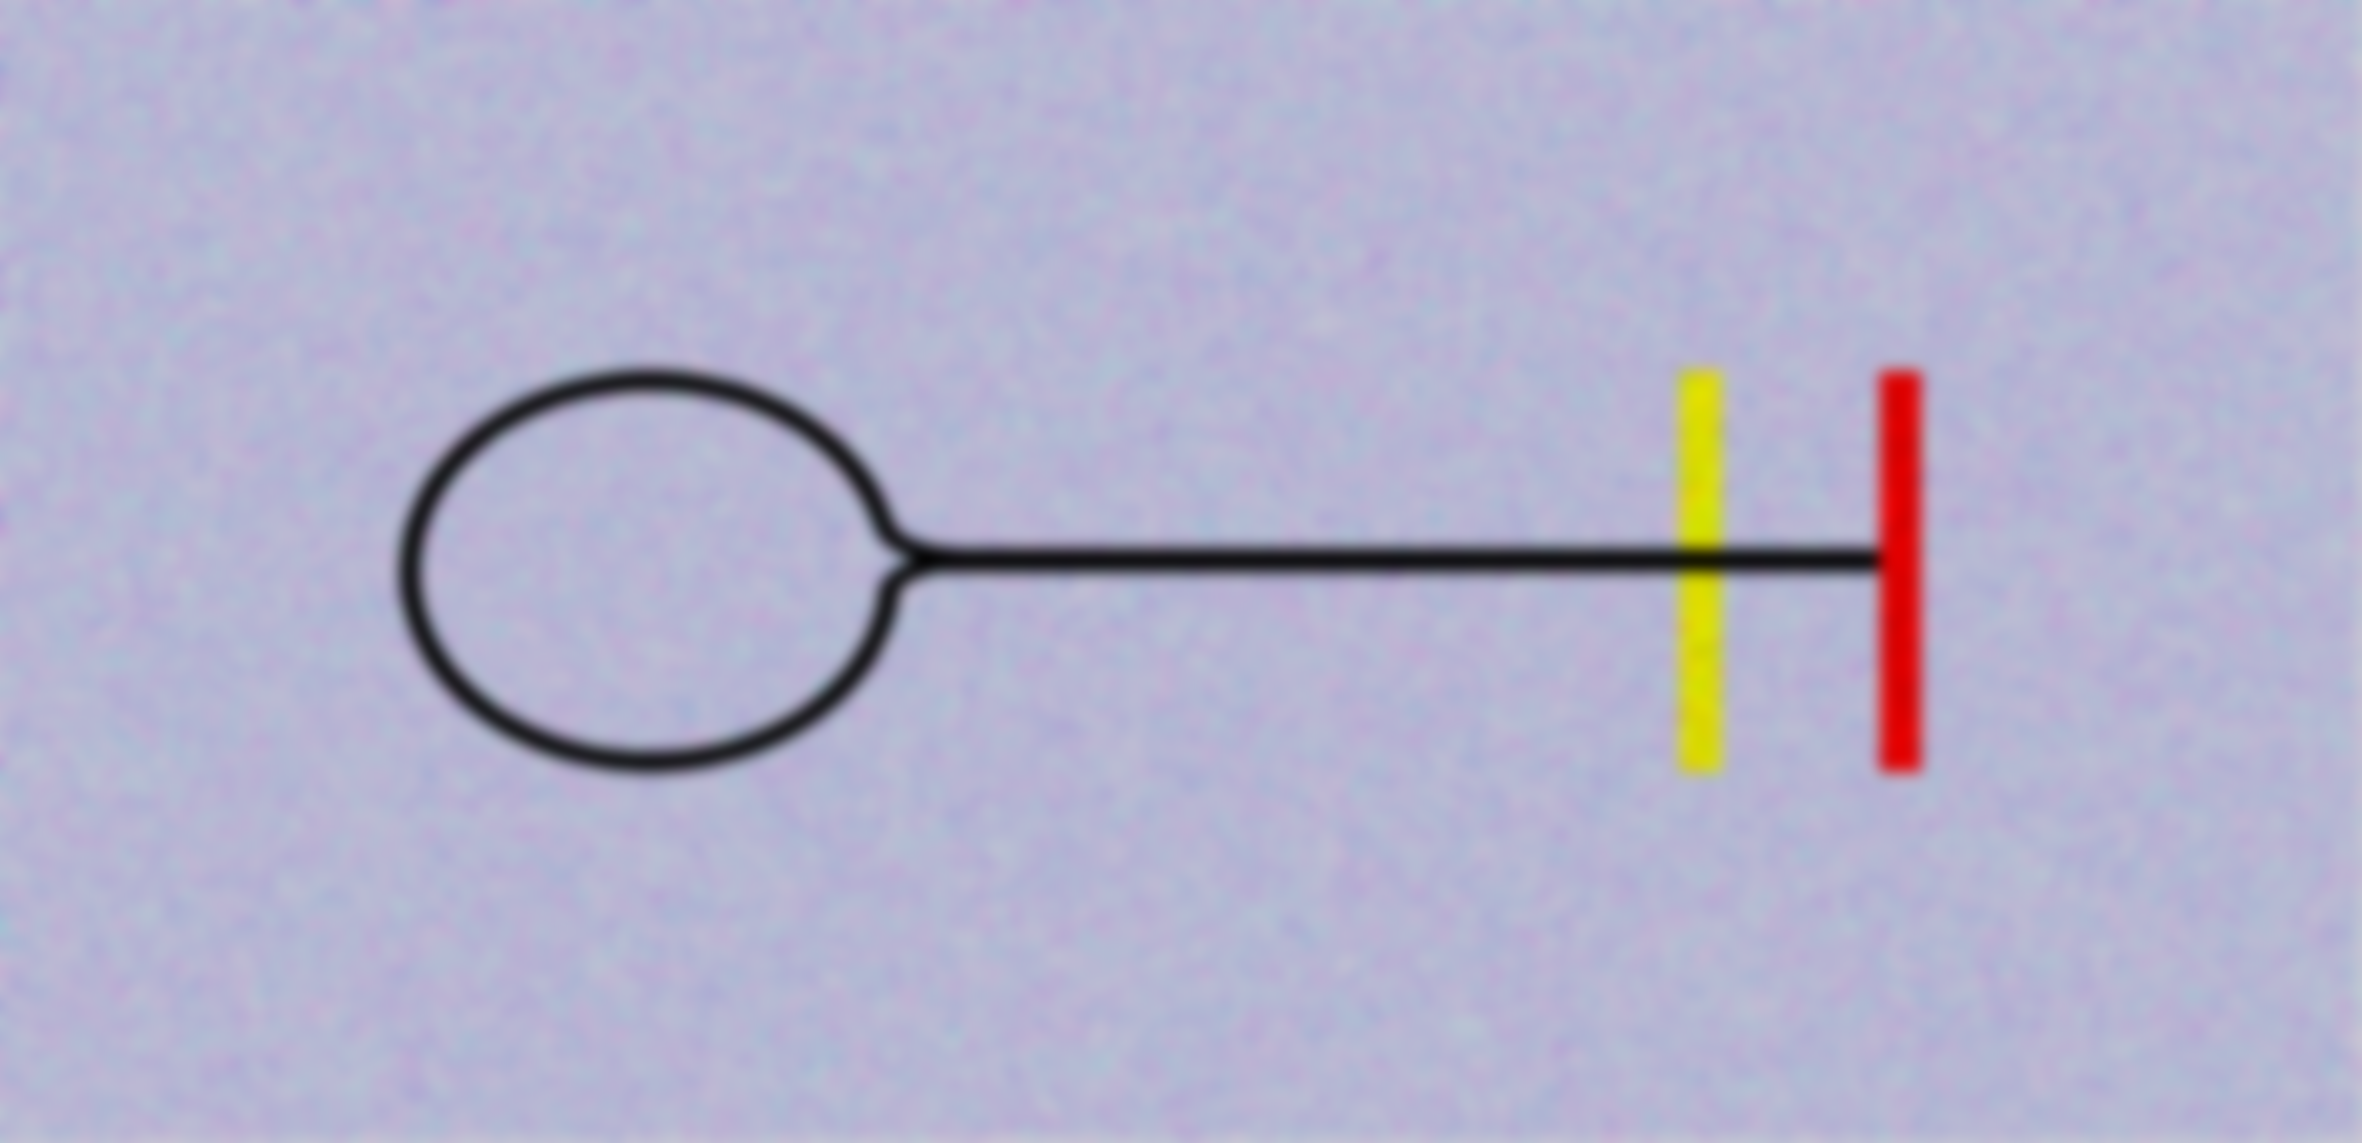

In [11]:
noisy_image = add_salt_and_pepper(img,0.1).filter(ImageFilter.GaussianBlur(7))
noisy_image.save(f'_backgrounds/_noisy{filename}')
noisy_image

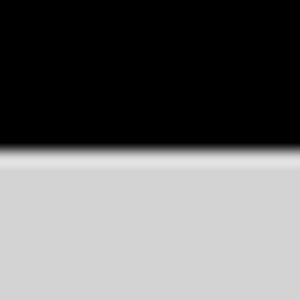

In [125]:
# Cropped image 
border = 10
start_x = inset+50
im1 = img.crop((start_x + eX/2 - border, y/2 - border, start_x + eX/2 + border, y/2+border)) 
resize = (300, 300) 
im1 = im1.resize(resize)  
im1 

### Zooming widget

May be better to do this in js? eg this looks nice, but how accessible is it? https://mark-rolich.github.io/Magnifier.js/

In [126]:
from ipywidgets import interact
    
@interact(x=(border, size[0]-border),
          y=(border, size[1]-border),
          border=[('5px', 5), ('10px', 10), ('20px', 20), ('30px',30)],
          continuous_update=False)
def image_zoom(x=100, y=100, border="10px"):
    """Zoom into part of image."""

    im1 = img.crop((x - border, y - border,
                    x + border, y + border)) 
    resize = (300, 300) 
    im1 = im1.resize(resize)
    im2 = img.copy().resize((size[0], size[1]))
    draw = ImageDraw.Draw(im2)
  
    draw.rectangle([(x - border, y - border), (x + border, y + border)],
                   outline ="blue", width=1) 

    display(im2)
    display(im1)

interactive(children=(IntSlider(value=100, description='x', max=2352, min=10), IntSlider(value=100, descriptio…

### Filtering

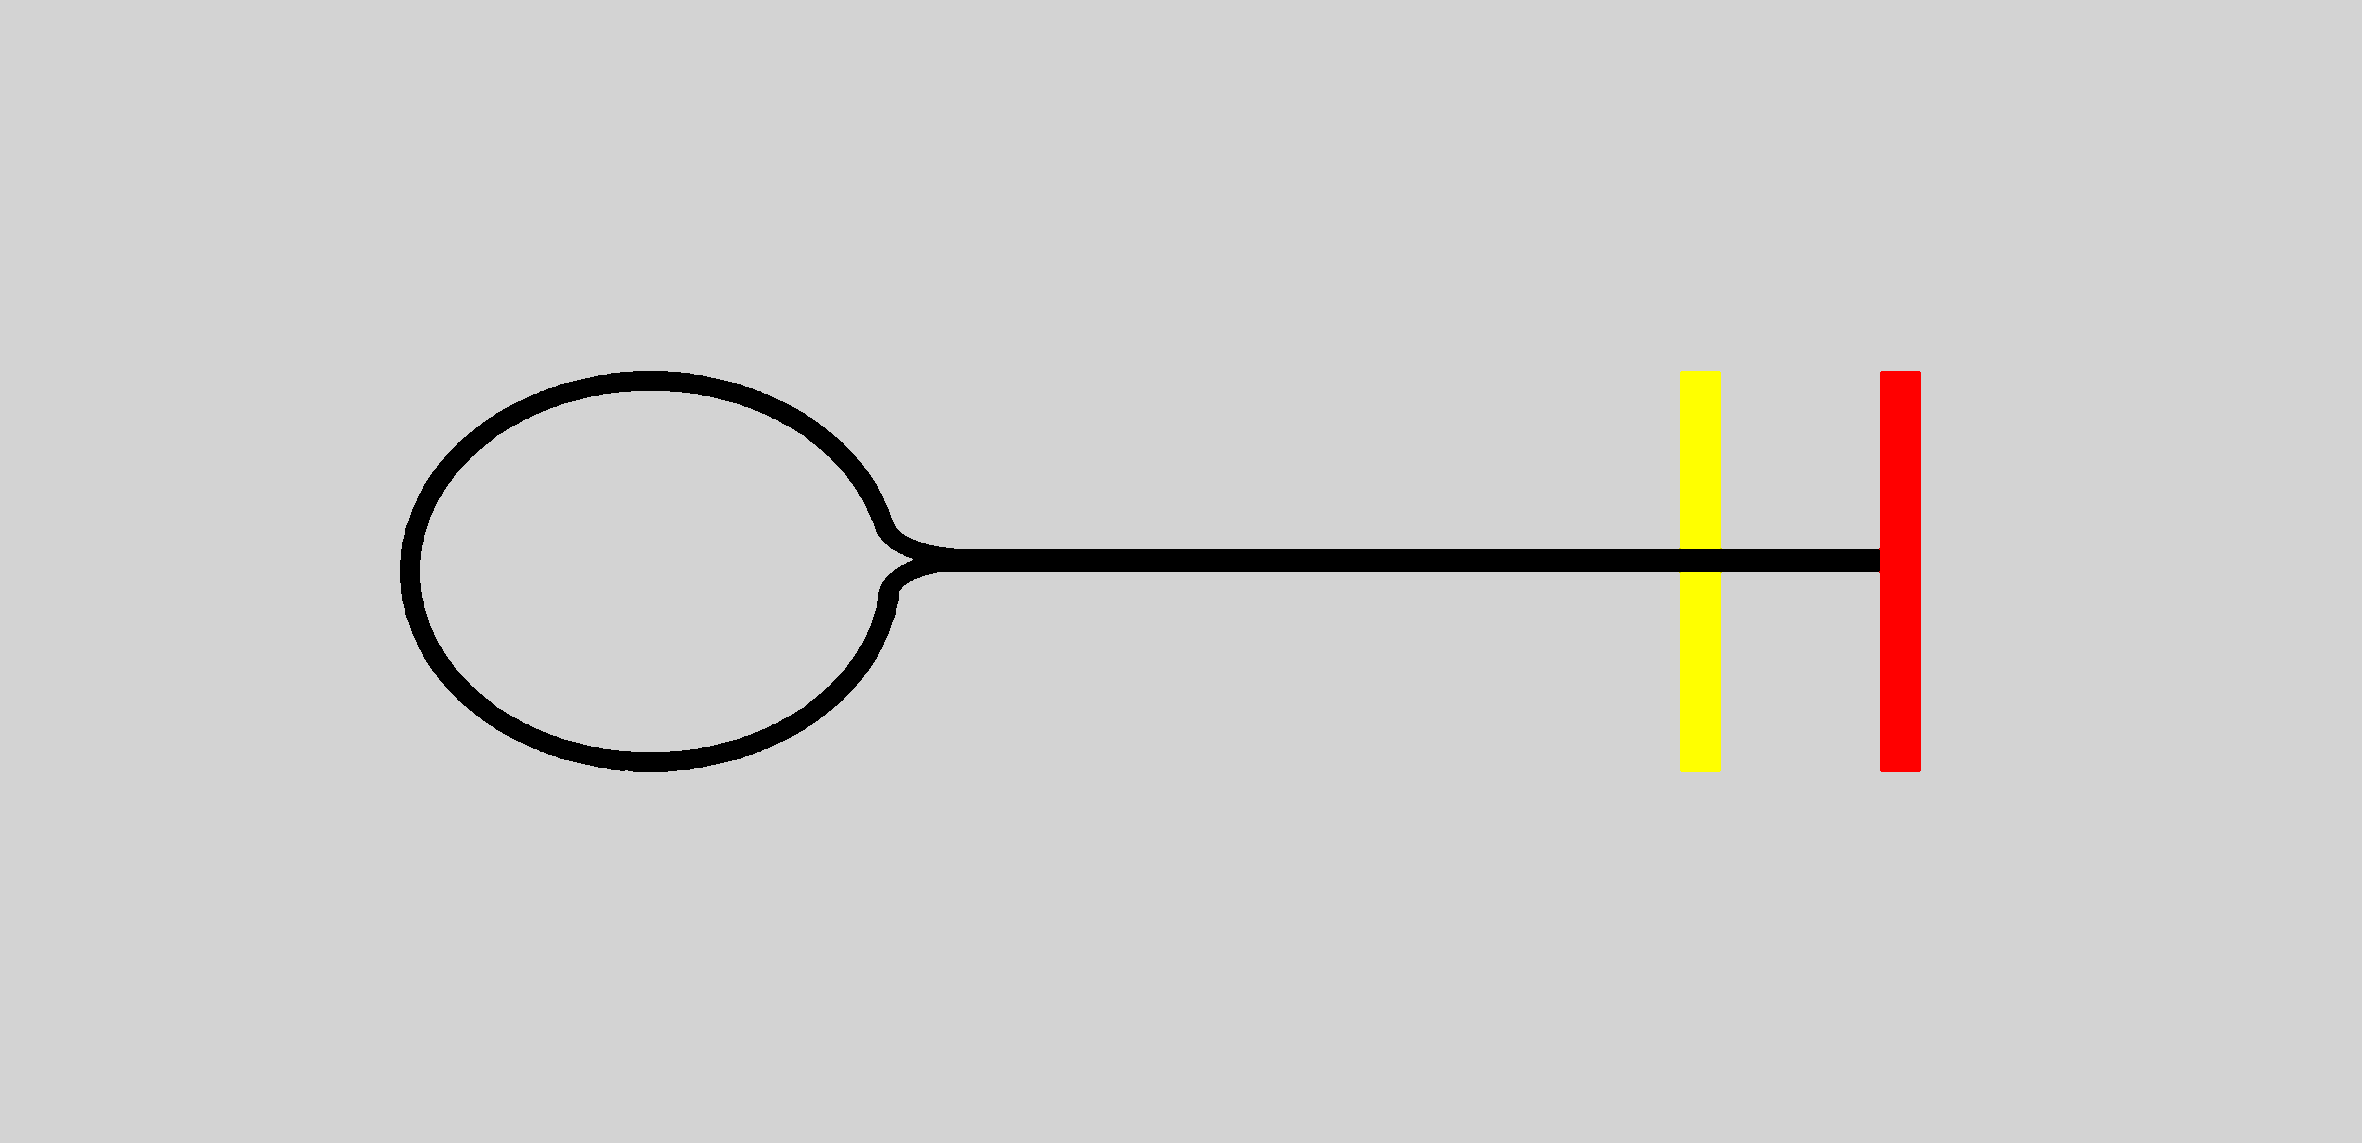

In [127]:
img.filter(ImageFilter.MedianFilter)

## Sensor Diameter Test

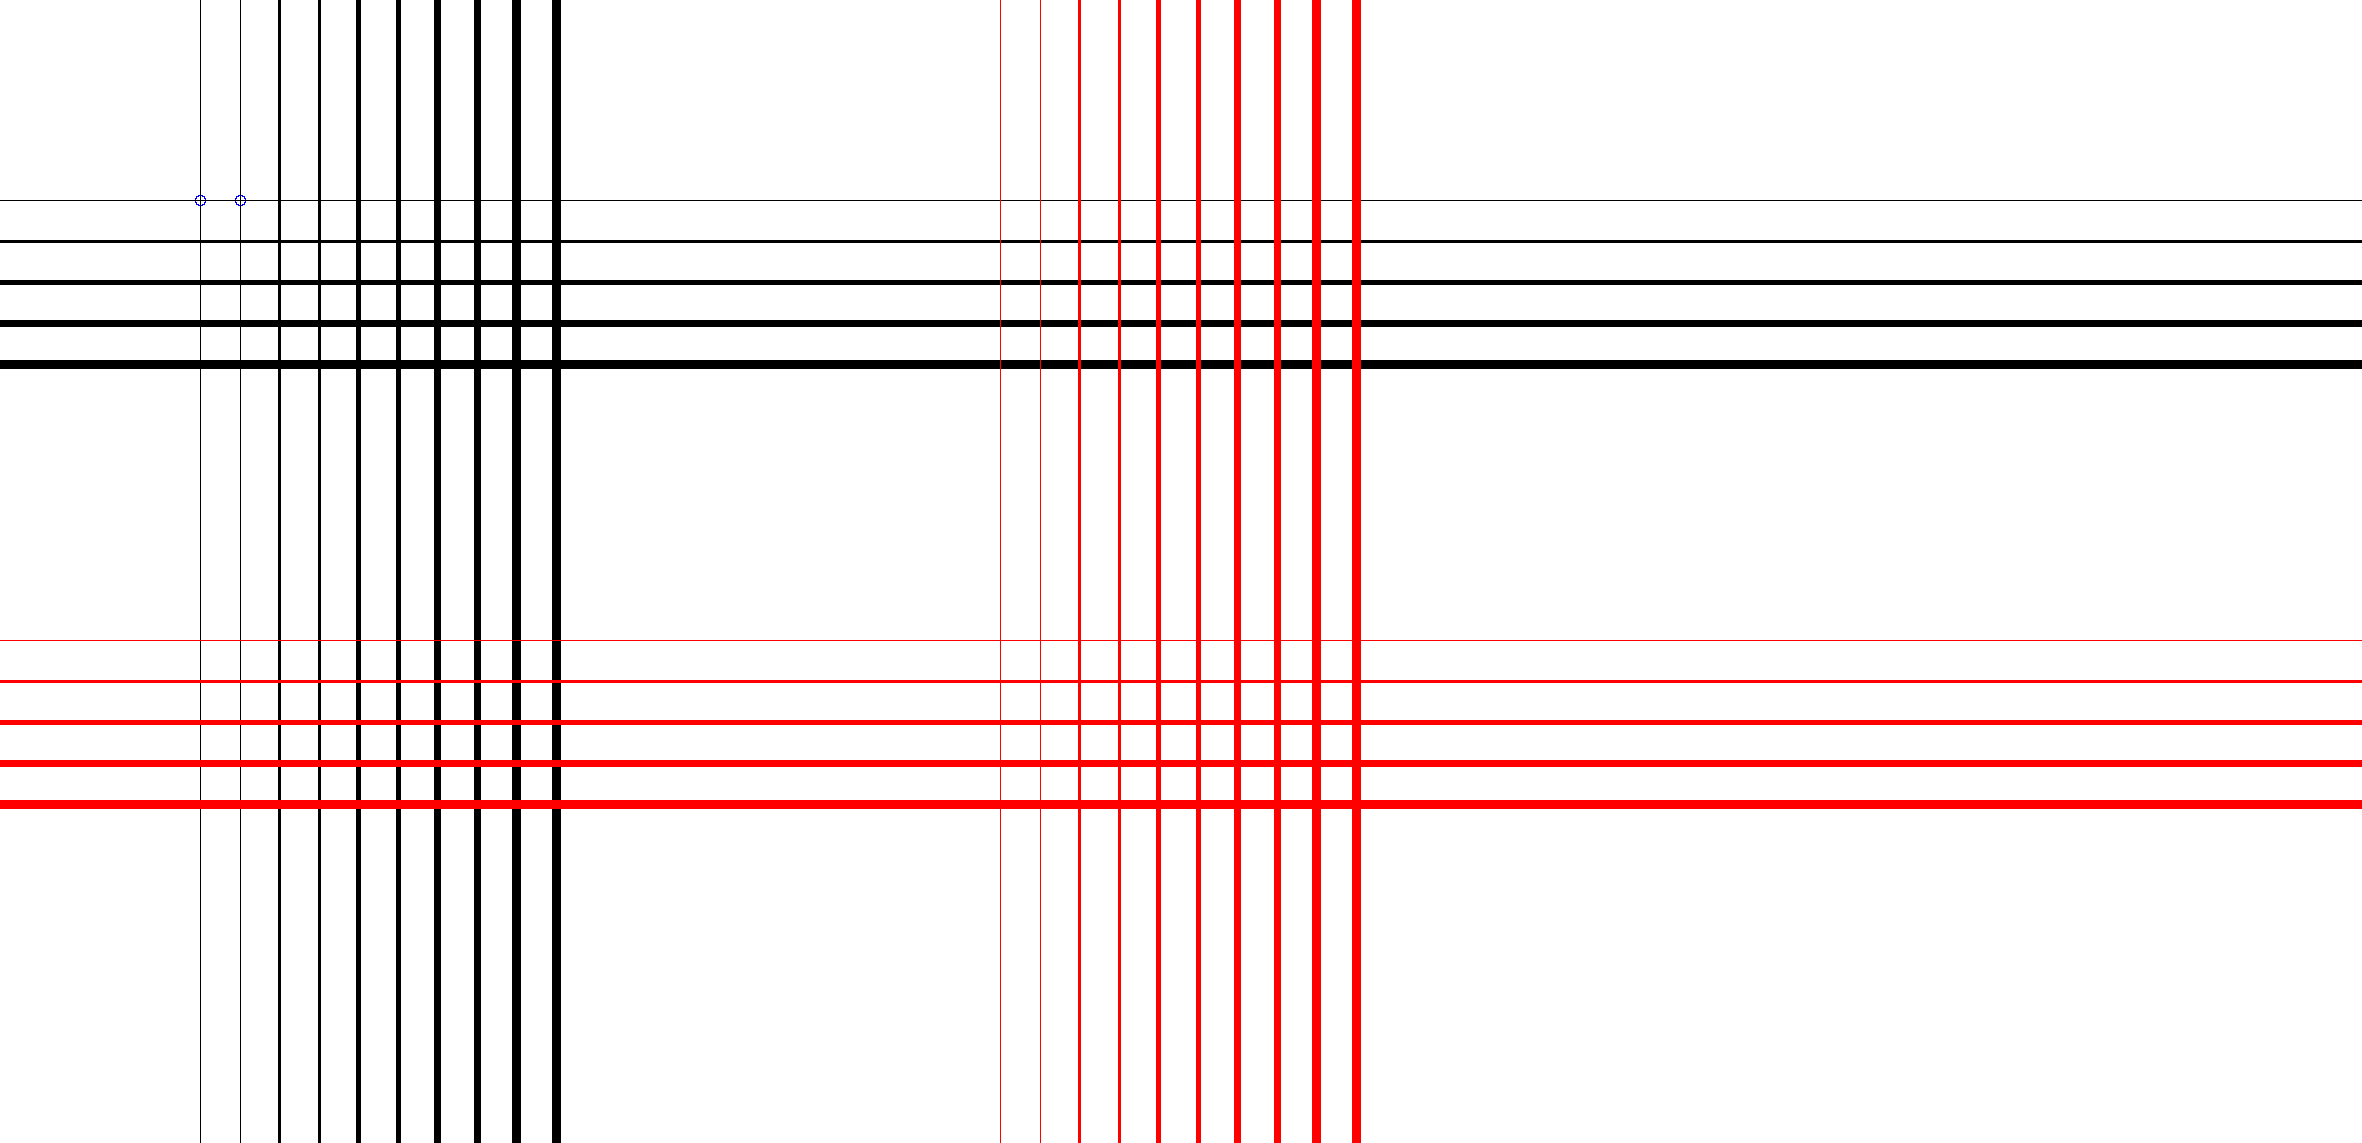

In [18]:
filename = '_backgrounds/_sensor_diameter_test.png'

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

_band_thickness = 2
_band_length = size[0]

_band_gap = 80
_band_gap_h = 40
_xh0 = 200
_xh = _xh0
_band_x0 = 0
_band_y0 = 200

_x = _band_x0
_y = 0

def bands(colour='black'):
    """Plot a series of bands."""
    for i in range(5):
        _y = _band_y0 + i*_band_gap_h
        _xh = _xh0 + 2 * i * (_band_gap_h - _band_thickness/2)
        draw.rectangle([(_x, _y),
                        (_x + _band_length, _y + i * _band_thickness)], fill=colour)
        
        draw.rectangle([(_xh, 0), (_xh + i * _band_thickness, size[1])], fill=colour)
        
        _xh = _xh + _band_gap_h
        draw.rectangle([(_xh, 0), (_xh + i * _band_thickness, size[1])], fill=colour)

draw.ellipse((_xh-5, _band_y0-5, _xh+5, _band_y0+5), outline ='blue')
draw.ellipse((_xh+35, _band_y0-5, _xh+45, _band_y0+5), outline ='blue')

bands()

_band_y0 = _y + 8 * _band_gap
_xh0 = 1000
bands('red')

    
img.save(filename)
I(filename)

## Simple sensor shapes

Test track that contains some simple shapes along a line.

200 200 square
280 200 equitri1
360 200 equitri2
440 200 equitri3
520 200 equitri4
600 200 diamond1


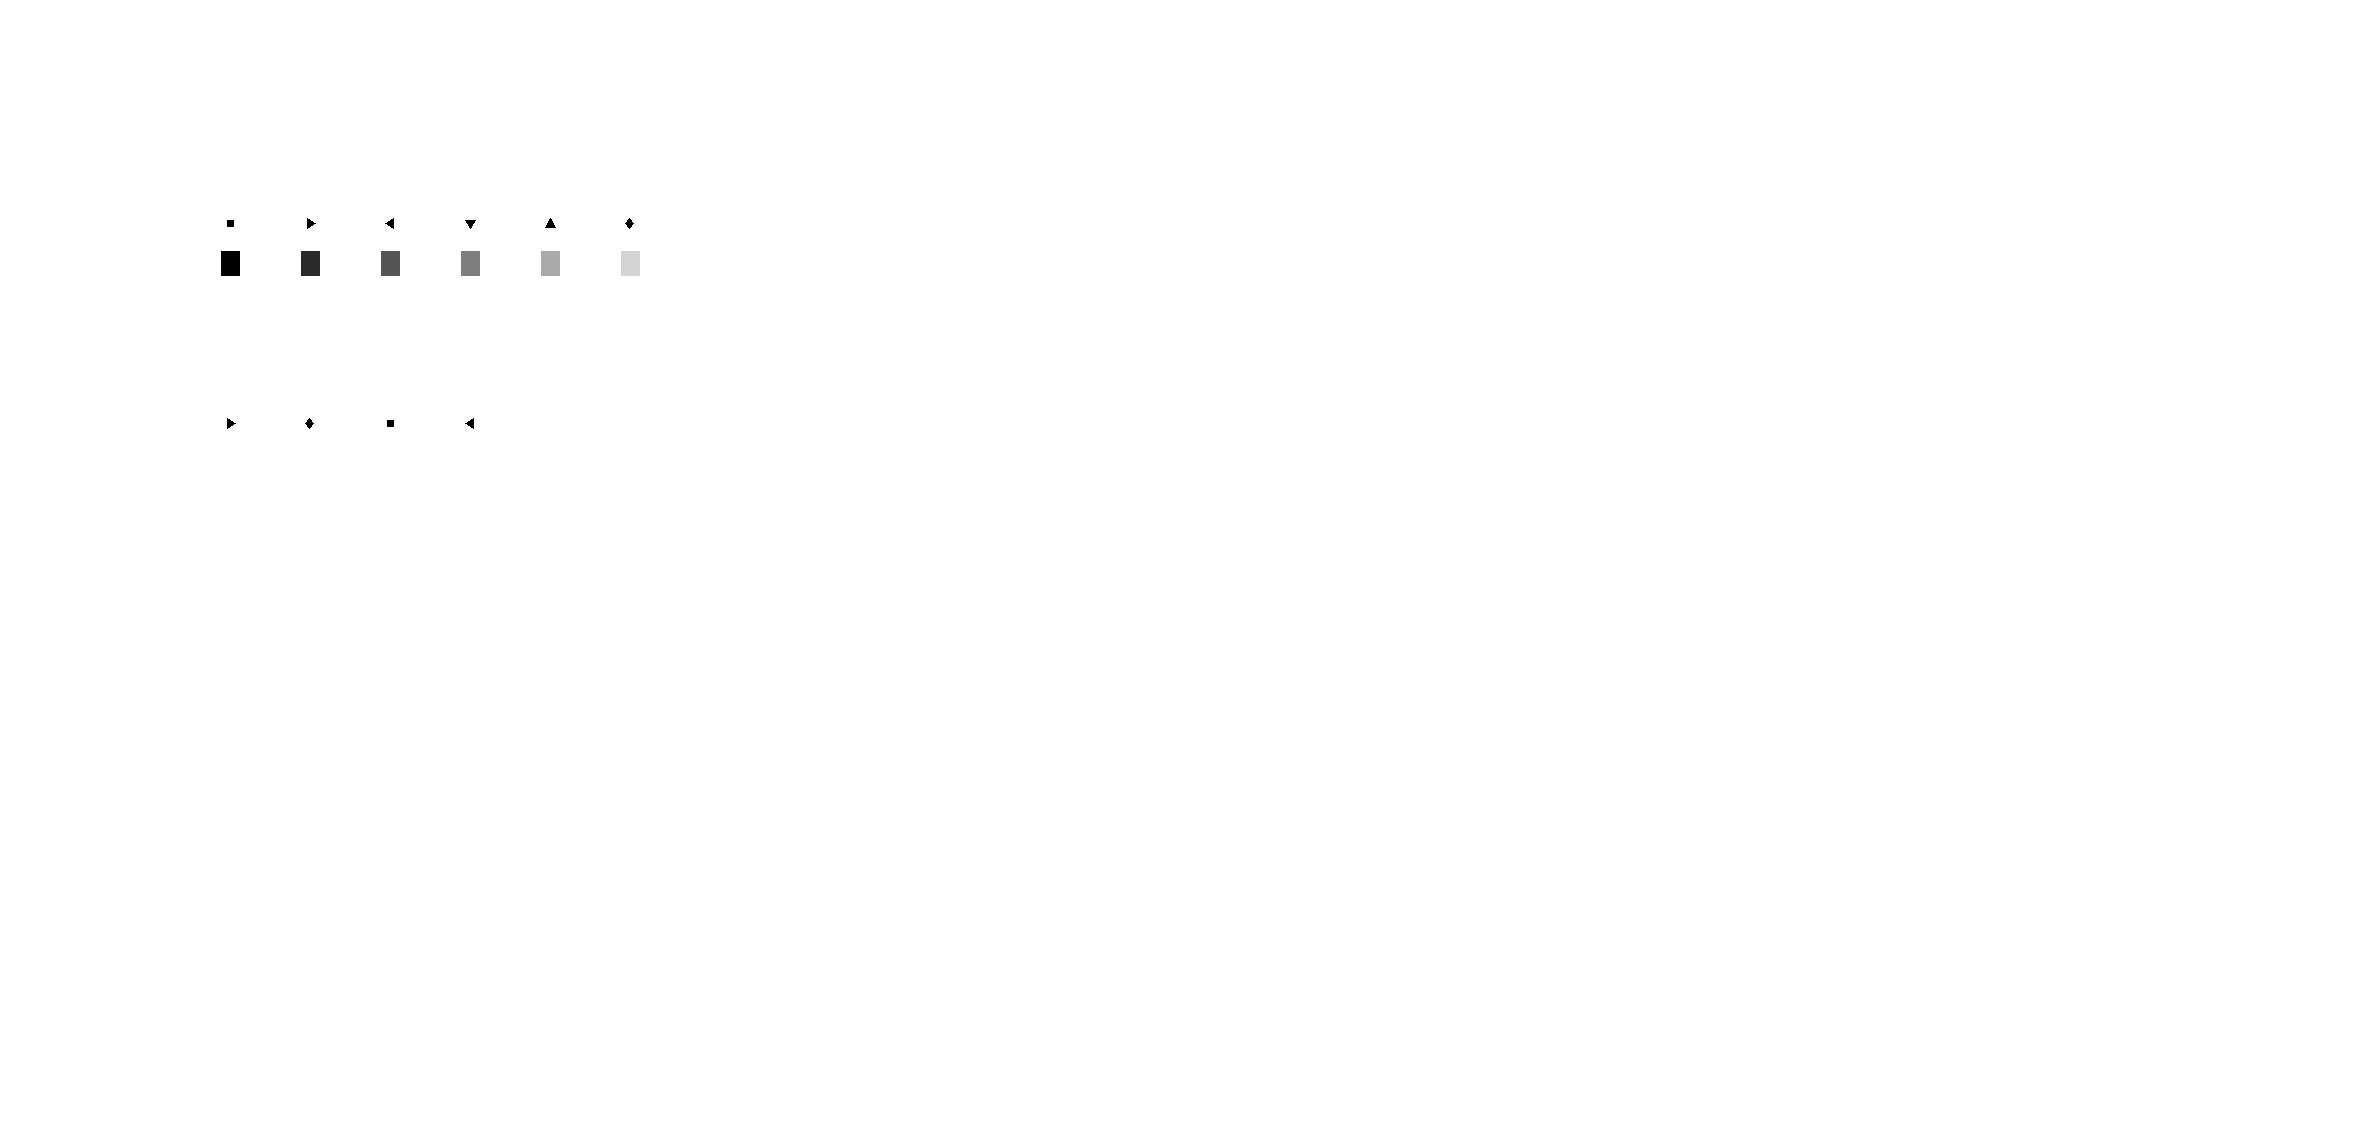

In [24]:
filename = '_backgrounds/_simple_shapes.png'

import math

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)

_side = 10

_x_delta = 80
_y_delta = 0


_centre_offset_x = 25
_centre_offset_y = 18

def _polygon_square(_x, _y, _side, draw, fill='black', mod=-4):
    _side = _side + mod
    _x += _centre_offset_x - mod/2
    _y += _centre_offset_y - mod/2
    draw.rectangle([(_x, _y), (_x + _side, _y + _side)], fill=fill)

def polygon_circle(_x, _y, _side, draw, fill='black', mod=-4):
    _side = _side + mod
    _x += _centre_offset_x - mod/2
    _y += _centre_offset_y - mod/2
    draw.ellipse((_x, _y, _x + _side, _y + _side), fill=fill)

def polygon_equitriangle1(_x, _y, _side, draw, fill='black'):
    _x += _centre_offset_x
    _y += _centre_offset_y
    _x += 2
    draw.polygon(((_x, _y), (_x, _y + _side), (_x + math.sqrt(3) * _side / 2, _y + _side / 2 )), fill=fill)

def polygon_equitriangle2(_x, _y, _side, draw, fill='black'):
    _x += _centre_offset_x
    _y += _centre_offset_y
    draw.polygon(((_x, _y + _side / 2 ), (_x + math.sqrt(3) * _side / 2, _y),
                  (_x + math.sqrt(3) * _side / 2, _y + _side)), fill=fill)

def polygon_equitriangle3(_x, _y, _side, draw, fill='black'):
    _x += _centre_offset_x
    _y += _centre_offset_y
    _y += 2
    draw.polygon(((_x, _y), (_x + _side / 2, _y + math.sqrt(3) * _side / 2), (_x + _side, _y)), fill=fill)

def polygon_equitriangle4(_x, _y, _side, draw, fill='black'):
    _x += _centre_offset_x
    _y += _centre_offset_y
    _y -= 1
    draw.polygon(((_x, _y + _side), (_x + _side / 2, _y + _side - math.sqrt(3) * _side / 2),
                  (_x + _side, _y + _side)), fill=fill)

def polygon_narrow_rectangle(_x, _y, _side, draw, fill='black'):
    _x += _centre_offset_x
    _y += _centre_offset_y
    draw.rectangle(((_x, _y + _side/4), (_x + _side-2, _y + 3 *_side / 4)), fill=fill)
    
def polygon_diamond1(_x, _y, _side, draw, fill='black'):
    _x += _centre_offset_x
    _y += _centre_offset_y
    _offset = math.sqrt(3) * _side / 2
    draw.polygon(((_x, _y + _side / 2 ), (_x + _offset / 2, _y + _side),  (_x + _offset, _y + _side / 2),
              (_x + _offset / 2, _y )), fill=fill)

def encoder(_x, _y, h, _enc_x = -4, _enc_y = 33):
    _x += _centre_offset_x
    _y += _centre_offset_y
    _x += _enc_x
    _y += _enc_y
    draw.rectangle([(_x, _y), (_x+18, _y+24)], fill=(h,h,h))

    
cmap = {'square': 0, 'equitri1': 1, 'equitri2': 2, 'equitri3': 3,
        'equitri4': 4, 'diamond1': 5}
for k in cmap:
    cmap[k] = int(cmap[k] * 255/len(cmap))

_x = 200
_y = 200

#Square
_polygon_square(_x, _y, _side, draw)
print(_x, _y, 'square')
encoder(_x, _y, cmap['square'] )

'''
_x += _x_delta
_y += _y_delta
#Circle
polygon_circle(_x, _y, _side, draw)
print(_x, _y, 'circle')
encoder(_x, _y, cmap['circle'] )
'''

_x += _x_delta
_y += _y_delta
# Equilateral triangle 1
polygon_equitriangle1(_x, _y, _side, draw)
print(_x, _y, 'equitri1')
encoder(_x, _y, cmap['equitri1'] )

_x += _x_delta
_y += _y_delta
# Equilateral triangle 2
polygon_equitriangle2(_x, _y, _side, draw)
print(_x, _y, 'equitri2')
encoder(_x, _y, cmap['equitri2'] )

_x += _x_delta
_y += _y_delta
# Equilateral triangle 3
polygon_equitriangle3(_x, _y, _side, draw)
print(_x, _y, 'equitri3')
encoder(_x, _y, cmap['equitri3'] )

_x += _x_delta
_y += _y_delta
# Equilateral triangle 4
polygon_equitriangle4(_x, _y, _side, draw)
print(_x, _y, 'equitri4')
encoder(_x, _y, cmap['equitri4'] )

'''
_x += _x_delta
_y += _y_delta
#Narrow rectangle
polygon_narrow_rectangle(_x, _y, _side, draw)
print(_x, _y, 'rect')
encoder(_x, _y, cmap['rect'] )
'''

_x += _x_delta
_y += _y_delta
# diamond 1
polygon_diamond1(_x, _y, _side, draw)
print(_x, _y, 'diamond1')
encoder(_x, _y, cmap['diamond1'] )


#Test track
_x = 200
_y = 400

# Equilateral triangle 1
polygon_equitriangle1(_x, _y, _side, draw)


_x += _x_delta
_y += _y_delta

# diamond 1
polygon_diamond1(_x, _y, _side, draw)


_x += _x_delta
_y += _y_delta

#Square
_polygon_square(_x, _y, _side, draw)


_x += _x_delta
_y += _y_delta
# Equilateral triangle 2
polygon_equitriangle2(_x, _y, _side, draw)


img.save(filename)
I(filename)

173.20508075688772
141.42135623730948
117.55705045849463


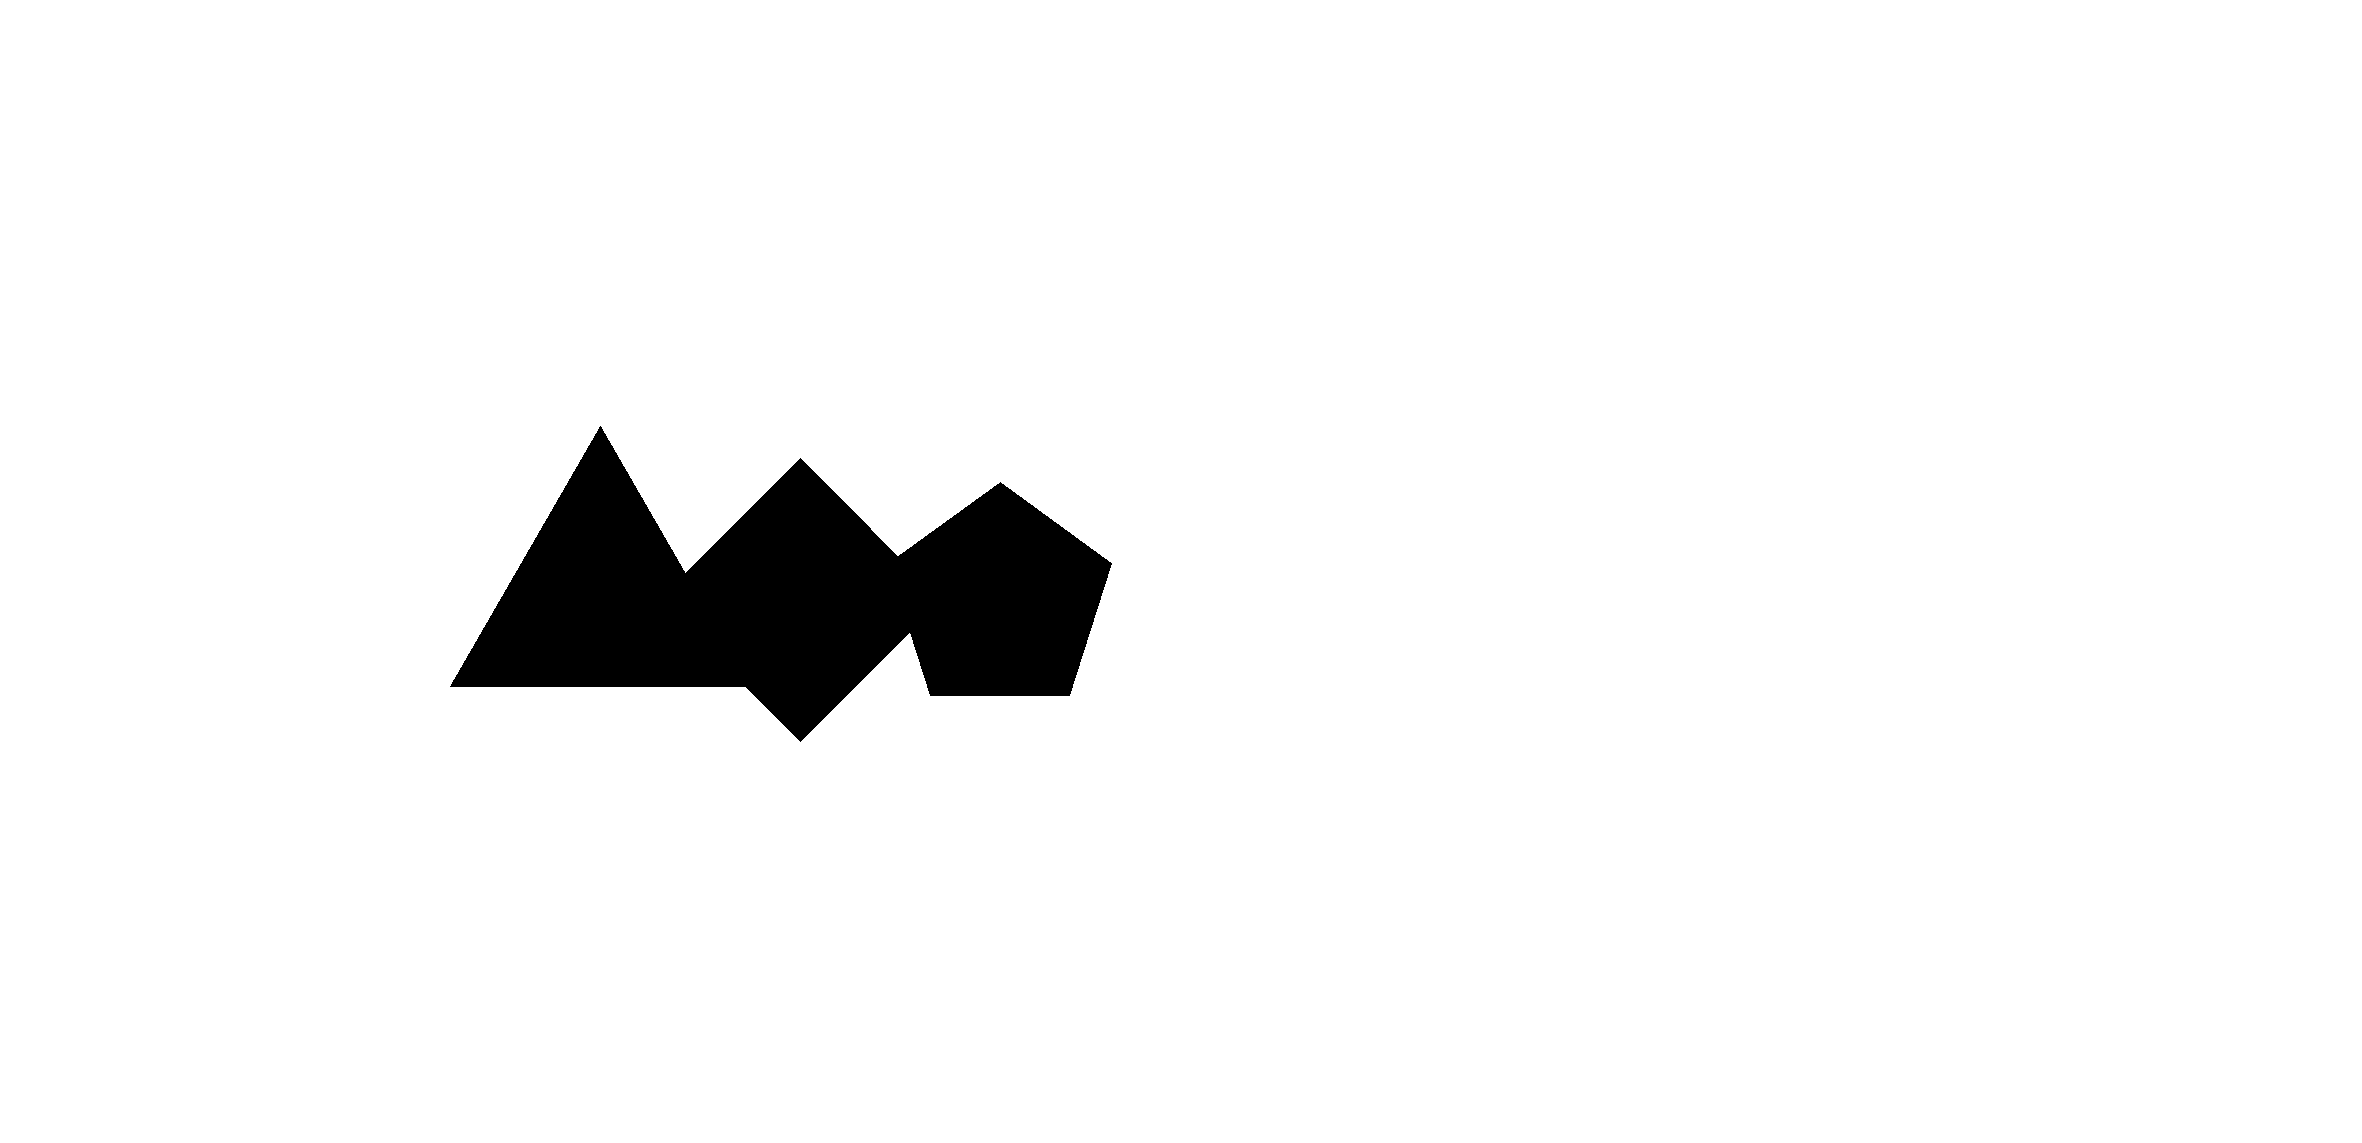

In [5]:
sides = 3
_side = 100

_x = 600
_y = 500

filename = '_backgrounds/_regular_shapes.png'


# The side lengths are not right
# Ideally want to fix the origin in the centre then have all polygons inside same radius circumcircle
# Also fix rotation angle
def regular_polygon(sides, _side, _x, _y, img=None):
    """Draw a regular polygon"""
    coords = []
        
    r = (2 * math.sin(math.pi / sides )) * _side
    print(r)
    _y = _y + _side
    

    for i in range(sides):
        theta = 2 * math.pi * i / sides
        coords.append((_x + r * math.sin(theta), _y - r * math.cos(theta)))

    if not img:
        img = Image.new(mode, size, color)

    draw = ImageDraw.Draw(img)

    draw.polygon(coords, fill='black')
    
    return img

img = Image.new(mode, size, color)

img = regular_polygon(sides, _side, _x, _y, img)
img = regular_polygon(sides+1, _side, _x + 2*_side, _y, img)
img = regular_polygon(sides+2, _side, _x + 4*_side, _y, img)

img.save(filename)
I(filename)

In [15]:
a = 0
b = 1
while a < 10:
    print(f'a and b incoming: {a, b}')
    a, b = b, a + b
    print(f'a and b outgoing: {a, b}')

a and b incoming: (0, 1)
a and b outgoing: (1, 1)
a and b incoming: (1, 1)
a and b outgoing: (1, 2)
a and b incoming: (1, 2)
a and b outgoing: (2, 3)
a and b incoming: (2, 3)
a and b outgoing: (3, 5)
a and b incoming: (3, 5)
a and b outgoing: (5, 8)
a and b incoming: (5, 8)
a and b outgoing: (8, 13)
a and b incoming: (8, 13)
a and b outgoing: (13, 21)


## MNIST Images

To fit in a 14 x 14 grid

In [3]:
!ls

'Background Image Generator.ipynb'   jupytergraffiti_data
 _backgrounds			     Kristi.ttf
 db.sqlite3			     mnist_batch_0_labels.txt
 db.sqlite3-shm			     mnist_batch_0.png
 db.sqlite3-wal			     out.png
'Flowchart Generator.ipynb'	     TreasureMap.ipynb


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253, 90, 0, 

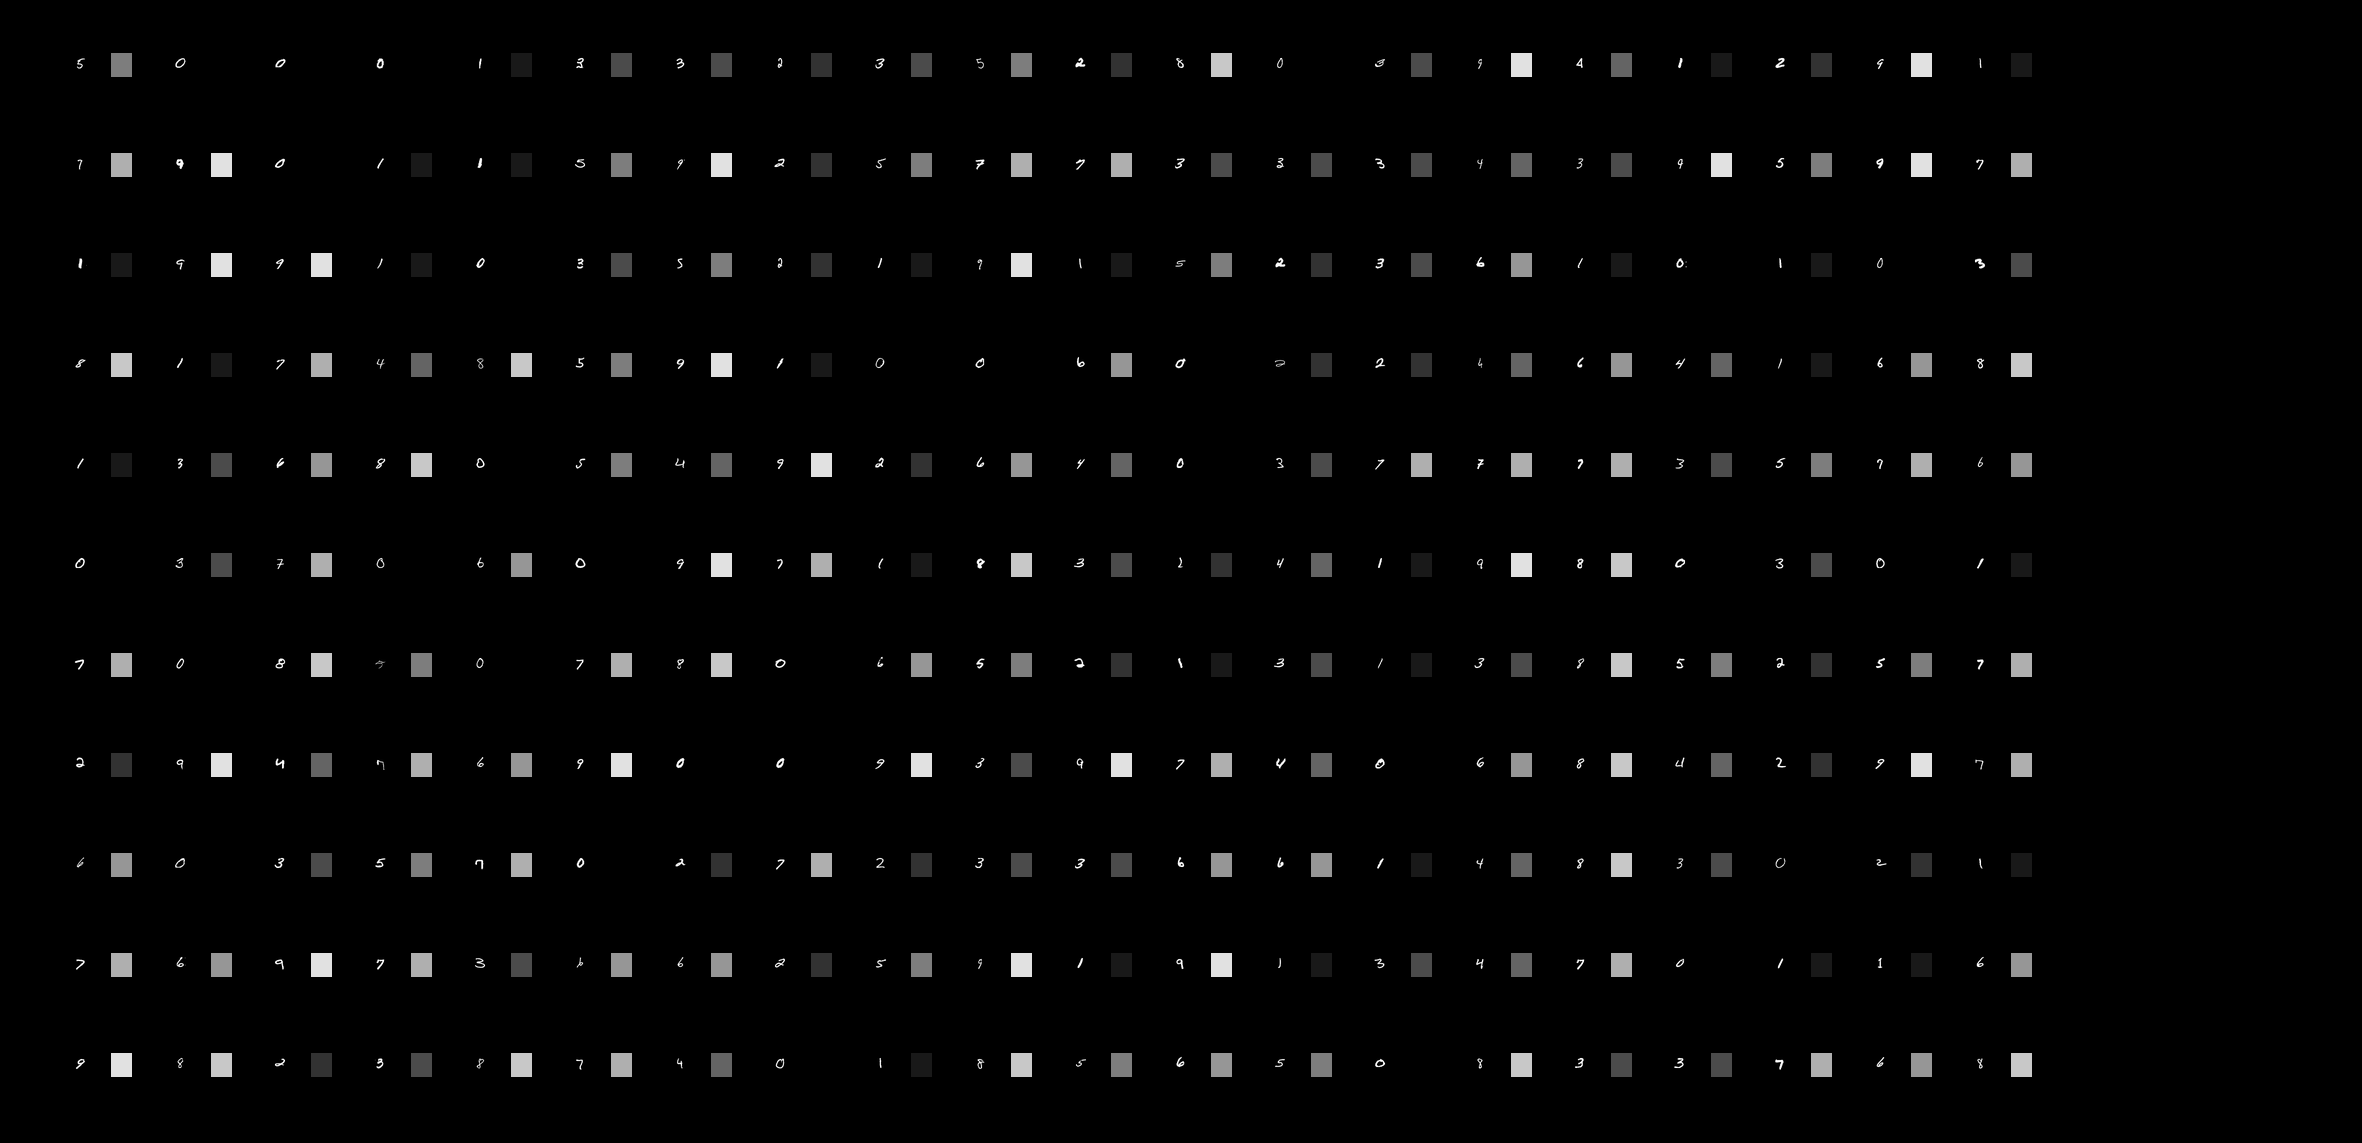

In [10]:
from IPython.display import Image as I
from PIL import Image, ImageDraw
from numpy.random import randint


filename='_backgrounds/_number_sheet.png'

mode = 'RGB'
size = (2362, 1143)
color = 'white'

from PIL import Image

#Load in the image data file
img = Image.open('mnist_batch_0.png')

import json
# The labels.txt file contains 3000 digit labels in the same order as the image data file
with open('mnist_batch_0_labels.txt', 'r') as f:
    labels = json.load(f)

# If we convert the image data to a one dimensional array (i.e. a list of values)
# the first 784 elements will represent the contents of the first row
# That is, a linear representation of the first 28 x 28 pixel sized handwritten digit image
print(list(img.getdata())[:784])

import numpy as np

# Turn the image data into a multidimensional array
# of 3000 separate 28 x 28 arrays
images_array = np.array(img).reshape(3000, 28, 28)

#Get the third item (index value 2), that is, the third 28 x 28 image data array
image_array = images_array[2]

# And convert it to an image
image_image = Image.fromarray(image_array)

# Then display it
image_image

img = Image.new(mode, size, color)
draw = ImageDraw.Draw(img)
img_cnt = len(images_array)


_x_offset = -27
_y_offset = 6


def coded_square(draw, x, y, h, offset=10):
    """Generate a simple coded square in the centre"""
    draw.rectangle([x+offset, y+offset, x+offset+1, y+offset+1], fill=(255, 0, 0))
    draw.rectangle([x+offset+1, y+offset, x+offset+2, y+offset+1], fill=(0, 255, 0))
    draw.rectangle([x+offset, y+offset+1, x+offset+1, y+offset+2], fill=(0, 0, 255))
    draw.rectangle([x+offset+1, y+offset+1, x+offset+2, y+offset+2], fill=(255-h, 255-h, 255-h))              
    
for i in range(20):
    for j in range(20):
        _img = randint(img_cnt)
        arr = images_array[_img]
        img_N = Image.fromarray(arr.reshape(28, 28), 'L')
        img_Ns = img_N.resize((14, 14), Image.LANCZOS)
        img.paste(img_Ns, (100+_x_offset+i*100, 50+_y_offset+j*100))
        #draw.text((100+i*100, 40+j*100), str(z[_img]), fill=(0,0,0))
        
        # We can draw a square with grey scale values that encode the training set value
        _x, _y = (100+i*100, 40+j*100)
        h = labels[_img] * 25
        draw.rectangle([(_x+38+_x_offset, _y+7+_y_offset),
                        (_x+58+_x_offset, _y+30+_y_offset)], fill=(h,h,h))

        #coded_square(draw, _x+38+_x_offset, _y+7+_y_offset, h)

img.save(filename)
I(filename)

## Elevation and Contours


In [10]:
#!pip install elevation
#!conda install -y  -c conda-forge gdal
#https://www.earthdatascience.org/tutorials/visualize-digital-elevation-model-contours-matplotlib/


#Maybe get topographical data for other planets, eg via recipe in:
# https://github.com/eleanorlutz/topography_atlas_of_space

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 

In [44]:
#!wget https://planetarymaps.usgs.gov/mosaic/Mars_MGS_MOLA_DEM_mosaic_global_463m.tif

In [8]:
# GIven lat long and bounding box, find other coords
#https://stackoverflow.com/a/238558/454773
# degrees to radians
import math

def deg2rad(degrees):
    return math.pi*degrees/180.0
# radians to degrees
def rad2deg(radians):
    return 180.0*radians/math.pi

# Semi-axes of WGS-84 geoidal reference
WGS84_a = 6378137.0  # Major semiaxis [m]
WGS84_b = 6356752.3  # Minor semiaxis [m]

# Earth radius at a given latitude, according to the WGS-84 ellipsoid [m]
def WGS84EarthRadius(lat):
    # http://en.wikipedia.org/wiki/Earth_radius
    An = WGS84_a*WGS84_a * math.cos(lat)
    Bn = WGS84_b*WGS84_b * math.sin(lat)
    Ad = WGS84_a * math.cos(lat)
    Bd = WGS84_b * math.sin(lat)
    return math.sqrt( (An*An + Bn*Bn)/(Ad*Ad + Bd*Bd) )

# Bounding box surrounding the point at given coordinates,
# assuming local approximation of Earth surface as a sphere
# of radius given by WGS84
def boundingBox(latitudeInDegrees, longitudeInDegrees, halfSideInM_x, halfSideInM_y):
    lat = deg2rad(latitudeInDegrees)
    lon = deg2rad(longitudeInDegrees)

    # Radius of Earth at given latitude
    radius = WGS84EarthRadius(lat)
    # Radius of the parallel at given latitude
    pradius = radius*math.cos(lat)

    latMin = lat - halfSideInM_y/radius
    latMax = lat + halfSideInM_y/radius
    lonMin = lon - halfSideInM_x/pradius
    lonMax = lon + halfSideInM_x/pradius

    return (rad2deg(latMin), rad2deg(lonMin), rad2deg(latMax), rad2deg(lonMax))


a, b, c, d = boundingBox(40.5, -121.5, size[0]*10, size[1]*20)

cc = f'{b} {a} {d} {c}'
cc

'-121.77943112487553 40.29435572326941 -121.22056887512448 40.70564427673059'

In [9]:
# Data from NASA's Shuttle Radar Topography Mission 
# latitude 41.15 and longitude -122.6, near Mt. Shasta in North California


#!eio clip -o Shasta-30m-DEM.tif --bounds -123 41 -122 42 
!eio clip -o Shasta-30m-DEM.tif --bounds $cc

make: Entering directory '/home/jovyan/.cache/elevation/SRTM1'
make: Nothing to be done for 'download'.
make: Leaving directory '/home/jovyan/.cache/elevation/SRTM1'
make: Entering directory '/home/jovyan/.cache/elevation/SRTM1'
make: Nothing to be done for 'all'.
make: Leaving directory '/home/jovyan/.cache/elevation/SRTM1'
make: Entering directory '/home/jovyan/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.0a65a2716e3c422da8174fb86a34ea65.vrt
make: Leaving directory '/home/jovyan/.cache/elevation/SRTM1'
make: Entering directory '/home/jovyan/.cache/elevation/SRTM1'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin -121.77943112487553 40.70564427673059 -121.22056887512448 40.29435572326941 SRTM1.0a65a2716e3c422da8174fb86a34ea65.vrt /home/jovyan/notebooks/content/backgrounds/Shasta-30m-DEM.tif
proj_context_get_database_path: Open of /srv/conda/envs/notebook/share/proj failed
ERROR 1: PROJ: proj_create_from_database: Open of /srv/conda/envs/notebook

In [ ]:
!gdaldem color-relief jotunheimen.tif 

In [10]:
filename = "Shasta-30m-DEM.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

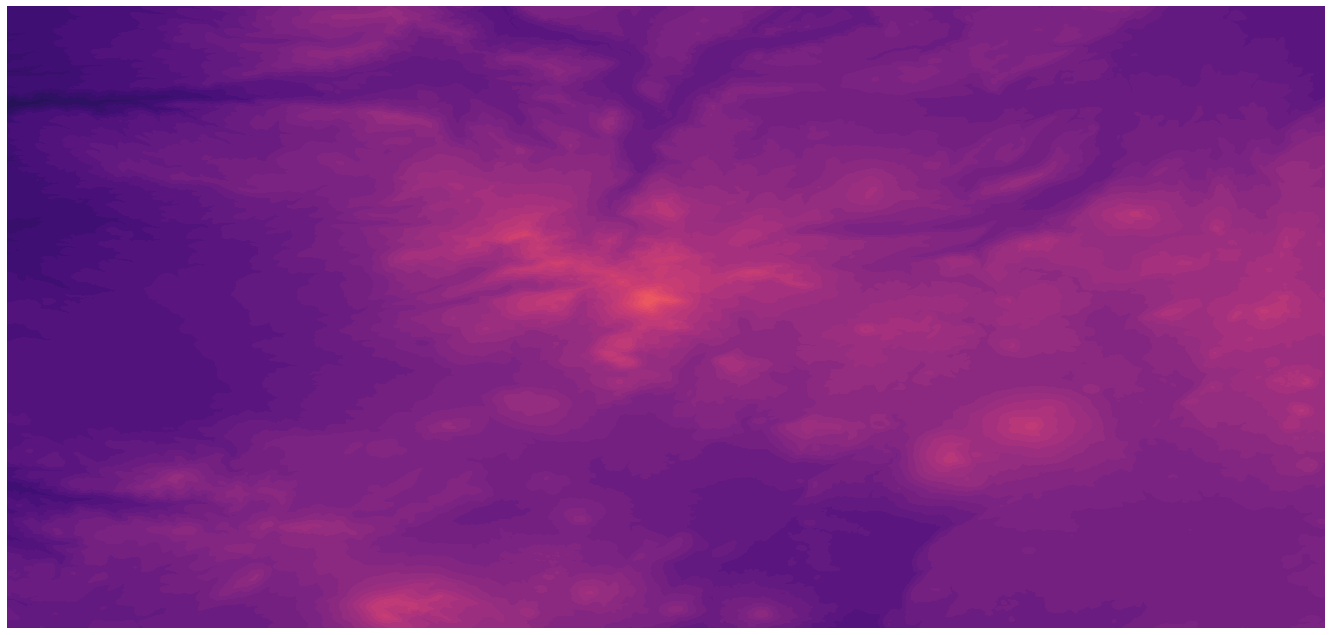

In [11]:
#Plot our data with Matplotlib's 'contourf'
size = (2362, 1143)

#https://stackoverflow.com/a/13714720/454773

#fig = plt.figure(figsize=(size[0]/100, size[1]/100), dpi=100)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "magma", # inferno, viridis, plasma, magma, cividis
            levels = list(range(0, 5000, 100)))
#plt.title("Elevation Contours of Mt. Shasta")
#cbar = plt.colorbar()
plt.gca()#.set_aspect('equal', adjustable='box')
plt.axis('off')
print(fig.get_size_inches()*fig.dpi)
fig.set_size_inches((size[0]/100, size[1]/100))
plt.savefig('Topo_map.png', dpi=100)
plt.show()

In [24]:
2362/ 1143, 432./ 288.

(2.0664916885389326, 1.5)

### Raster Lidar

In [53]:
#%pip install rasterio
#%pip install shapely
#%pip install earthpy

In [13]:
#https://www.earthdatascience.org/workshops/gis-open-source-python/open-lidar-raster-python/

import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist
from shapely.geometry import Polygon, mapping
from rasterio.mask import mask

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# set home directory and download data
et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


In [59]:
!ls data/spatial-vector-lidar/california/neon-soap-site/2013/lidar

SOAP_lidarCHM.tif	   SOAP_lidarDSM.tif
SOAP_lidarCHM.tif.aux.xml  SOAP_lidarDTM.tif


In [14]:
# define path to digital terrain model
sjer_dtm_path = "data/spatial-vector-lidar/california/neon-soap-site/2013/lidar/SOAP_lidarDTM.tif"
#sjer_dtm_path = "notebooks/content/uk_lidar_test.tif"
# open raster data
lidar_dem = rio.open(sjer_dtm_path)
# optional - view spatial extent
lidar_dem.bounds

BoundingBox(left=296906.0, bottom=4100038.0, right=300198.0, top=4101554.0)

In [15]:
!pwd

/home/jovyan/earth-analytics


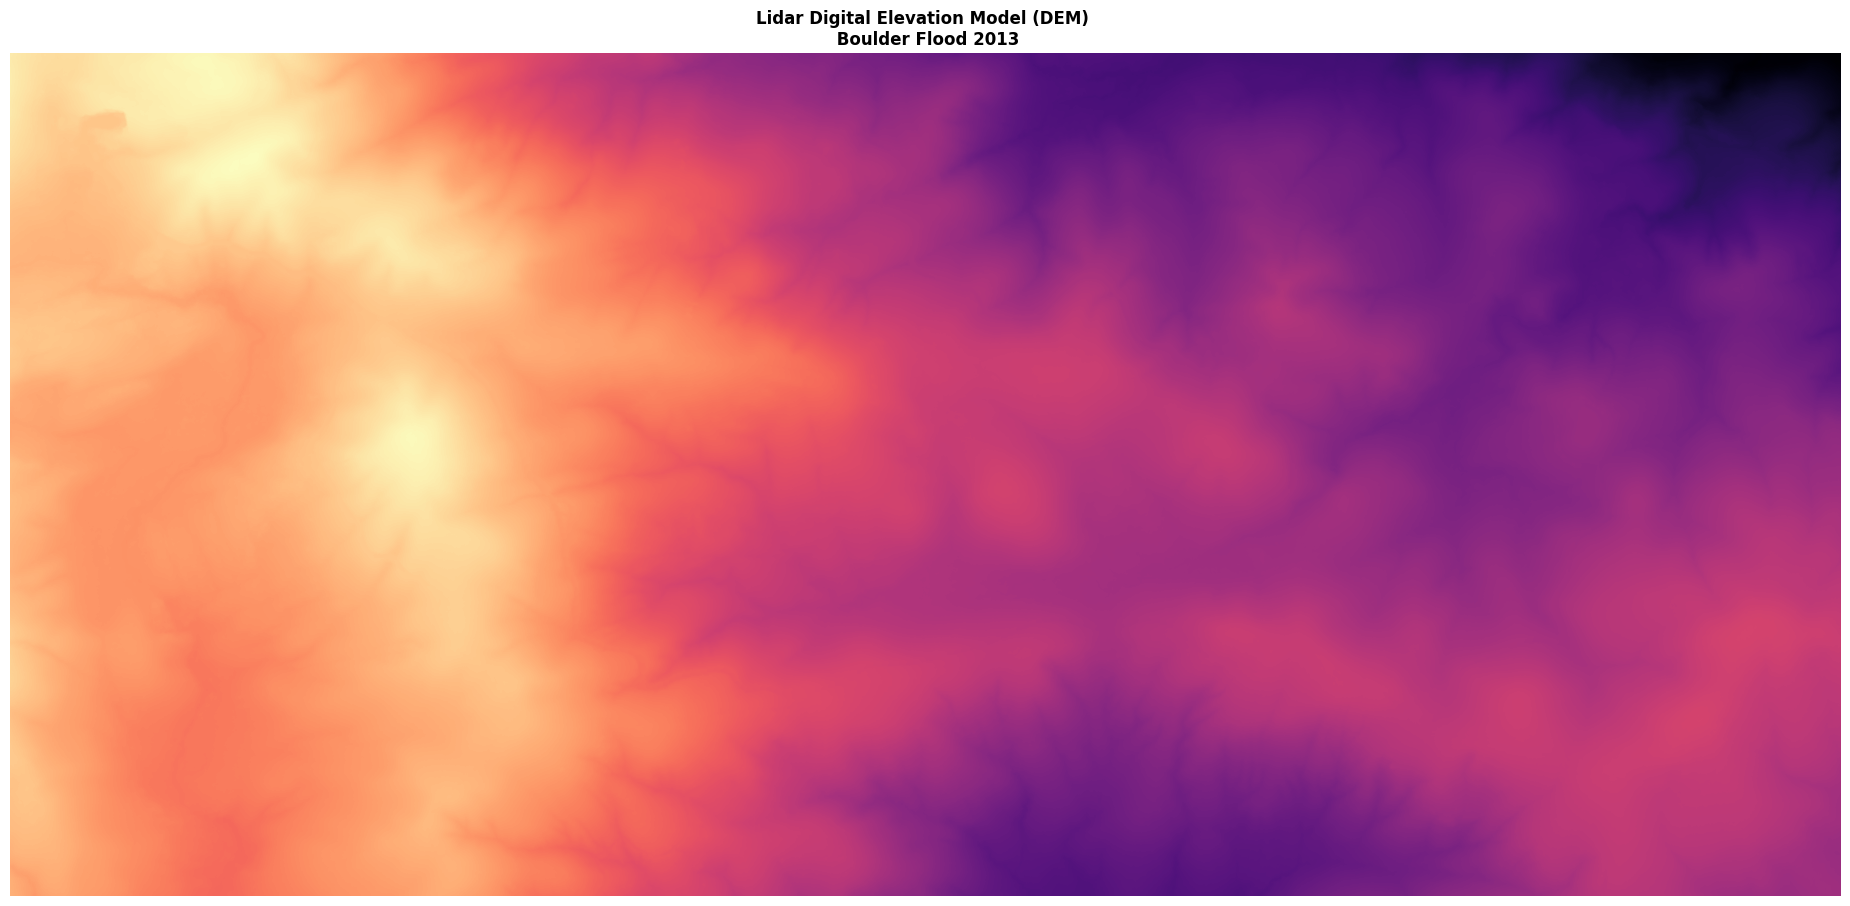

In [22]:
# plot the dem using raster.io
fig, ax = plt.subplots(figsize=(size[0]/100, size[1]/100), dpi=100)
show(lidar_dem, 
     title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013", 
     ax=ax, cmap='magma')

ax.set_axis_off()
plt.savefig("test_lidar.png",bbox_inches='tight',dpi=100)

In [22]:
# defra lidar
#https://www.roger-pearse.com/weblog/2019/07/08/tutorial-how-to-download-the-lidar-datasets-from-the-uk-environment-agency-website/comment-page-1/
%cd ~
!ls notebooks/content/LIDAR-DSM-2M-SZ68nw/

/home/jovyan
sz6085_DSM_2M.asc  sz6187_DSM_2M.asc  sz6289_DSM_2M.asc  sz6486_DSM_2M.asc
sz6086_DSM_2M.asc  sz6188_DSM_2M.asc  sz6385_DSM_2M.asc  sz6487_DSM_2M.asc
sz6087_DSM_2M.asc  sz6189_DSM_2M.asc  sz6386_DSM_2M.asc  sz6488_DSM_2M.asc
sz6088_DSM_2M.asc  sz6285_DSM_2M.asc  sz6387_DSM_2M.asc  sz6489_DSM_2M.asc
sz6089_DSM_2M.asc  sz6286_DSM_2M.asc  sz6388_DSM_2M.asc
sz6185_DSM_2M.asc  sz6287_DSM_2M.asc  sz6389_DSM_2M.asc
sz6186_DSM_2M.asc  sz6288_DSM_2M.asc  sz6485_DSM_2M.asc


In [45]:
#https://gis.stackexchange.com/a/169494
!gdal_translate notebooks/content/LIDAR-DSM-2M-SZ68nw/sz6187_DSM_2M.asc notebooks/content/uk_lidar_test.tif

Input file size is 500, 500
proj_context_get_database_path: Open of /srv/conda/envs/notebook/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.
